In [ ]:
!pip install pandas==1.5.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 33.4 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 1.5.3 which is incompatible.


In [ ]:
import pandas as pd
import numpy as np
import string
import re
import nltk

In [ ]:
youtube = pd.read_csv("youtube_beacukai_raw.csv")

youtube.sample(10)

,cid,text,time,author,channel,votes,replies,photo,heart,reply,time_parsed
7488,UgwLBOSdfCjmv31Au1t4AaABAg,"Barang masuk indo susah,,,tahanan keluar indo ...",9 hari yang lalu,@agungwaluya-qn8vx,UCadSvJCYptOGKFy7V6di4uQ,0,NaN,https://yt3.ggpht.com/ZJvODiHH4fpbx_N6o62DJHMe...,False,False,1.715539e+09
4340,UgygkJjhZi48pKzv6hN4AaABAg.A2oD2DUz2GdA2pCuk73gqS,Apnya hy tegur sj,3 minggu yang lalu,@user-oh5md2rf5d,UC86AAo2U5AhqDs00pUj2MWg,0,NaN,https://yt3.ggpht.com/ytc/AIdro_kKZlTbnrgzCSGe...,False,True,1.714503e+09
4590,UgxrD3h7ucbt7MjmF6J4AaABAg,Rampok ..,1 hari yang lalu,@user-cm3gz2uj5b,UCg6p31Pao9XHWkMD8r4S22Q,0,NaN,https://yt3.ggpht.com/ytc/AIdro_nda3NuW4HXFz11...,False,False,1.716231e+09
8200,UgwoL91PlhoHWaafprZ4AaABAg,"Bu srimulyani, kekayaan pejabat BEA CUKAI seha...",6 hari yang lalu,@punyubotok700,UCwTchoJB0sXZos34f5DOSUg,0,NaN,https://yt3.ggpht.com/ytc/AIdro_nDqhbIyIWAyptF...,False,False,1.715799e+09
3705,UgzVUzy3owYqt-V7L8R4AaABAg,Terlalu banyak jenis pajak yang dibebankan ke ...,3 minggu yang lalu,@suronosurono4863,UCg7wFHPCq1OajP1nXe_BXhw,0,NaN,https://yt3.ggpht.com/ytc/AIdro_lT9ddKONt7iDL5...,False,False,1.714503e+09
6830,UgzpIMGsZK_UbgxpHNd4AaABAg,Para pegawai bea cukai gak perlu beli barang d...,3 minggu yang lalu,@budianto1347,UCclwjOn0f2gn19mBbYdKNAg,0,NaN,https://yt3.ggpht.com/ytc/AIdro_lOzjR1YhdEipDV...,False,False,1.714503e+09
3423,Ugy0uXEWuckJ746d-Wt4AaABAg,Gratifikasi 😂,3 minggu yang lalu,@lukmanulhakim5312,UCdbALxM4e4iQO8yL5YMIr6Q,0,NaN,https://yt3.ggpht.com/ytc/AIdro_l4p62uxg9vIOyJ...,False,False,1.714503e+09
3789,UgxWaBQIoPqZyhfh6xR4AaABAg,JANGAN CUMAN TEGURAN 😠 apa cuman bu sriliyani ...,3 minggu yang lalu,@kinghandsome1770,UCnjhOO2bEAZ-bvy67LbkkQQ,0,NaN,https://yt3.ggpht.com/UFHrD0O2nuss8znY6ZhP4YL7...,False,False,1.714503e+09
2255,UgwqPmRQCShuQmNMiRh4AaABAg,Songong benget kakinya sri,2 minggu yang lalu,@ReGud-cq8ek,UChRG2ZPI8BcnU-hY2Uf0sUg,0,NaN,https://yt3.ggpht.com/ytc/AIdro_ktgf3psRkAgKqg...,False,False,1.715107e+09
4231,UgxthvUbsurdmbtCa814AaABAg.A2oR8SiHC8NA2ouYKirecz,Mana punya nyali ibu ini,3 minggu yang lalu,@salvatoremaximus6754,UCZKkbP0Mq1aVdHu_X1vhD4w,4,NaN,https://yt3.ggpht.com/ytc/AIdro_n3tDI2L2ef8zXI...,False,True,1.714503e+09


In [ ]:
def remove_pattern(comment, pattern):

    r = re.findall(pattern, str(comment))

    for i in r:
        comment = re.sub(i, '', str(comment))

    return comment

youtube['clean_comment'] = np.vectorize(remove_pattern)(youtube['text'], "@[\w]*")

youtube.sample(10)

,cid,text,time,author,channel,votes,replies,photo,heart,reply,time_parsed,clean_comment
595,UgyjMbK6c3LqdBO_qo14AaABAg,Itu kekayaan pak dirjen BC s.d 51m apakah waja...,9 hari yang lalu,@arwien227,UCl8IlGBpJMp_xqfHh-X5ODA,0,NaN,https://yt3.ggpht.com/ytc/AIdro_k5liLpyybZzkOZ...,False,False,1.715539e+09,Itu kekayaan pak dirjen BC s.d 51m apakah waja...
8779,Ugw6HtNQlZYiz1CO2kV4AaABAg,Bobrok.........SRIMULYANI.....G I M A N A .......,4 minggu yang lalu,@erwinhudoyono3699,UCXJC_HfHQ7vXm9Y5hP8_DfQ,0,NaN,https://yt3.ggpht.com/ytc/AIdro_lh1s3Vv6WDb_pB...,False,False,1.713898e+09,Bobrok.........SRIMULYANI.....G I M A N A .......
6369,Ugy5pRKXDcbVuu9pFlh4AaABAg,Rampok berseragam....,3 minggu yang lalu,@jadduonly5890,UCb09p1g3eiMU1RMFg3kTobQ,0,NaN,https://yt3.ggpht.com/ytc/AIdro_mDmnvrqE_K78Ax...,False,False,1.714503e+09,Rampok berseragam....
1101,UgzhDC2zSTvZX_ZI0Fd4AaABAg,Aaahhh barang tkw aja Di baker.😅😅😅😅,2 minggu yang lalu,@saripudinsamadukik8651,UCHkEhtV1hbgEgduCam33ESQ,0,NaN,https://yt3.ggpht.com/ytc/AIdro_ln-9HYXgytSDFQ...,False,False,1.715107e+09,Aaahhh barang tkw aja Di baker.😅😅😅😅
3419,UgwV3r_7ijlPHVStsW94AaABAg,Klu tdk ditanggapi oleh ibu in kt lapor ke pre...,3 minggu yang lalu,@user-oh5md2rf5d,UC86AAo2U5AhqDs00pUj2MWg,0,NaN,https://yt3.ggpht.com/ytc/AIdro_kKZlTbnrgzCSGe...,False,False,1.714503e+09,Klu tdk ditanggapi oleh ibu in kt lapor ke pre...
4620,UgzbFKreZOa8h0QeFPB4AaABAg,perampokan resmi wkwkwk,2 hari yang lalu,@Hampirpintar,UCtzZR9kHsSOtO11buzEXROQ,0,NaN,https://yt3.ggpht.com/N560e7puAXSWEP5En-_xa-oC...,False,False,1.716144e+09,perampokan resmi wkwkwk
33,UgyaW97d41ncIgdK3V94AaABAg,"Mulai sepatu sampai CELANA DALAM WANITA, jadi ...",1 hari yang lalu (diedit),@GANSChanel,UCngykkEOJ6BctjmDo9rCbSA,1,NaN,https://yt3.ggpht.com/ytc/AIdro_lq2Lz8H9HENeQ2...,False,False,1.716230e+09,"Mulai sepatu sampai CELANA DALAM WANITA, jadi ..."
71,UgxGDGOPDc7Sf0IPToh4AaABAg,Dari sini terlihat bukan miss komunikasi serin...,1 hari yang lalu (diedit),@bombom1518,UCpzK9vYb3B1w5ZGQJlX9QJA,0,NaN,https://yt3.ggpht.com/ytc/AIdro_kOb7QQDcZFwpMI...,False,False,1.716230e+09,Dari sini terlihat bukan miss komunikasi serin...
1654,UgzRv8oOmKd03dUN2-54AaABAg,Bertele tele sekali,2 minggu yang lalu,@opungsira3260,UC1h2m7zn69IBwALm0mfIN7Q,0,NaN,https://yt3.ggpht.com/ytc/AIdro_kl977CUrLwnVV9...,False,False,1.715107e+09,Bertele tele sekali
4360,UgzWsfO7qL2UaMvzgaN4AaABAg.A2oCojQW9MaA2wfAMtCj_v,"Keyboardnya itu wajib dipakai sama mereka, aga...",2 minggu yang lalu,@budyantocahyahdi4490,UCrPRnfCbGVuVjBiYtTl0Leg,0,NaN,https://yt3.ggpht.com/ytc/AIdro_m9dWJbw_DMLYyi...,False,True,1.715107e+09,"Keyboardnya itu wajib dipakai sama mereka, aga..."


In [ ]:
def remove_punctuation(text):

    text_with_spaces = ''.join([char if char not in string.punctuation else ' ' for char in text])

    words_without_punct = [word for word in text_with_spaces.split() if word]

    cleaned_text = ' '.join(words_without_punct)

    return cleaned_text


youtube['clean_comment'] = youtube['clean_comment'].apply(lambda x : remove_punctuation(x))

youtube.sample(10)

,cid,text,time,author,channel,votes,replies,photo,heart,reply,time_parsed,clean_comment
8123,UgxH0kwrsZzWR01r3T94AaABAg,BEA CUKAI GAJI SDH BESAR PULUHAN JUTA MASIH M...,6 hari yang lalu,@Wastomo,UCOhk8e_BA3ifzuC7skyrUFA,3,NaN,https://yt3.ggpht.com/ytc/AIdro_lBFXtfxDOzi7lm...,False,False,1.715799e+09,BEA CUKAI GAJI SDH BESAR PULUHAN JUTA MASIH MI...
4873,UgzAhz_NHnRd7TcRnhd4AaABAg,Ya kalau jelas gak bisa pungli.,13 jam yang lalu,@rancangtoyono84,UC9DOxqYziL9Z55KfAmQfUmg,0,NaN,https://yt3.ggpht.com/ytc/AIdro_kYbOjvdcBpG0ms...,False,False,1.716270e+09,Ya kalau jelas gak bisa pungli
212,UgwMQL2sDl-q0Ne93xV4AaABAg,Lah tai anjing hukum di Indonesia...,3 hari yang lalu,@pujiharyanto6370,UC2VWCLGxDdkq4TzVjf9-xqQ,0,NaN,https://yt3.ggpht.com/ytc/AIdro_kumUAO-vDqQ2LE...,False,False,1.716058e+09,Lah tai anjing hukum di Indonesia
5977,UgywlHQO7JK1XMGtt494AaABAg,pejabat indo kbnyakan otaknya goblok smua,2 minggu yang lalu,@masbotaks6630,UCg177hmJoKkEy_hlh92aVJw,0,NaN,https://yt3.ggpht.com/ytc/AIdro_muYsOINMU3yBNN...,False,False,1.715107e+09,pejabat indo kbnyakan otaknya goblok smua
5776,UgwP26nIAIG8c3btNk14AaABAg,Korupsiii terang terang😢,2 minggu yang lalu,@nerooVergil,UCBl-s6G5tWptNofcgU9kBRw,0,NaN,https://yt3.ggpht.com/_2kyLEXddeLu1Z61W2FIqvJw...,False,False,1.715107e+09,Korupsiii terang terang😢
7677,UgyskCm_AUb5G28tUjx4AaABAg,Dari A Sampr Z pelayanan jelek semua 😡😡😡😡😡😡😡😡😡...,2 minggu yang lalu,@ChuFian-ce8gg,UCBNlprFPmHypEhusOPML2CQ,0,NaN,https://yt3.ggpht.com/ytc/AIdro_mFwh2IrAgSRZ0b...,False,False,1.715107e+09,Dari A Sampr Z pelayanan jelek semua 😡😡😡😡😡😡😡😡😡...
1264,Ugyp1pF3lYi-up18Q9B4AaABAg,Masa barang gratis diberi pajak tinggi,2 minggu yang lalu,@hantuax6287,UCeu8xeBSixUDW5wo3X6iKWA,0,NaN,https://yt3.ggpht.com/ytc/AIdro_krviA0EJoDuSfq...,False,False,1.715107e+09,Masa barang gratis diberi pajak tinggi
2793,UgwyLsPPsaxZ7lwh3GR4AaABAg,"sungguh ironik, kalo kita beli sepetu dari lua...",3 minggu yang lalu,@hendrayana1559,UCA7UJhW5Q9hHTVeAhYjNdgA,0,NaN,https://yt3.ggpht.com/sac7b9tJZ7Ten0BAk6n89LP2...,False,False,1.714503e+09,sungguh ironik kalo kita beli sepetu dari luar...
3774,Ugzhp_mRdTh8PY2CiQN4AaABAg,"Viral dulu, baru terselesaikan...",3 minggu yang lalu,@riyosatria5849,UCI1bym_U8eqC-rTT-PXqPkw,0,NaN,https://yt3.ggpht.com/ytc/AIdro_kmSNedN5HWyBKF...,False,False,1.714503e+09,Viral dulu baru terselesaikan
7465,UgwpjGc7SHEx2YSrNQN4AaABAg,SUDAH AKUT.... BUBARKAN BEA CUKAI.... GANTI DE...,5 hari yang lalu,@listiyantomoechlis4850,UCIdF_1XJE0kSUO9To4dyOJw,0,NaN,https://yt3.ggpht.com/ytc/AIdro_k9XrKEjeqnVQ_E...,False,False,1.715885e+09,SUDAH AKUT BUBARKAN BEA CUKAI GANTI DENGAN INS...


In [ ]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F92D"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

youtube['clean_comment'] = youtube['clean_comment'].apply(remove_emoji)

youtube.sample(10)

,cid,text,time,author,channel,votes,replies,photo,heart,reply,time_parsed,clean_comment
6400,UgzkqIrGJFM7WpWBoQ54AaABAg,B€a cut4! Lagi berusaha memperkaya keluarga nya,3 minggu yang lalu,@situmbu8154,UCwm4HsWYNG65nTICLoxts4w,0,NaN,https://yt3.ggpht.com/ytc/AIdro_mbdw79JGc5mlEF...,False,False,1.714503e+09,B€a cut4 Lagi berusaha memperkaya keluarga nya
4497,UgyiZqmCb_He6L7iV2p4AaABAg.A2o9lolSsXIA2pBVJPZvJ3,​ @jacobchrismb5447 ayo kpk audit,3 minggu yang lalu,@user-oh5md2rf5d,UC86AAo2U5AhqDs00pUj2MWg,0,NaN,https://yt3.ggpht.com/ytc/AIdro_kKZlTbnrgzCSGe...,False,True,1.714503e+09,​ ayo kpk audit
799,UgwZU2eW5pNV1_Il_7J4AaABAg,"Horanggg kaya semua pegawai bea cukai nih, kpk...",12 hari yang lalu,@anakmanggarai5816,UCdfKe0vFHNew3LlGKFmUJrA,0,NaN,https://yt3.ggpht.com/ytc/AIdro_ms8HurLfICc5Dc...,False,False,1.715280e+09,Horanggg kaya semua pegawai bea cukai nih kpk ...
3679,UgxhAaW3HY2NMIoRGWt4AaABAg,"Wkawkawka,,itulah indo,barang impor harga seri...",3 minggu yang lalu,@aladin1698,UCwbZPrexwig8txlXrjBhZfw,0,NaN,https://yt3.ggpht.com/ytc/AIdro_ksEWf1zeY_aeR2...,False,False,1.714503e+09,Wkawkawka itulah indo barang impor harga serib...
6800,UgyIHFirC2UPxaQUZUJ4AaABAg,"Selama yg berbuat kesalahan gak dipecat, gak a...",3 minggu yang lalu,@redapple1683,UCxnkCvIFMUOGwZUAULR1Q4g,0,NaN,https://yt3.ggpht.com/ytc/AIdro_kTHO1qukuM7HsE...,False,False,1.714503e+09,Selama yg berbuat kesalahan gak dipecat gak ak...
6065,UgxarxY12BYYn0jhAyx4AaABAg,Cara2 pemerintah lndonesia yang goblok Dan tol...,2 minggu yang lalu,@afiqaiman3562,UCsJR-4IODuWtVAGqqEe3UQw,0,NaN,https://yt3.ggpht.com/ytc/AIdro_kuX4hRwfXDrjKQ...,False,False,1.715107e+09,Cara2 pemerintah lndonesia yang goblok Dan tol...
8718,Ugz9TSx9NMbUz6lgdAV4AaABAg.A2nrjzAuvUcA2nyQnseFhe,"Iya, kalo viral baru ditangani. Padahal penump...",3 minggu yang lalu,@user-bf6tn7xd6q,UC9NevramE417NU4eWjtvCqg,1,NaN,https://yt3.ggpht.com/C1pFS_cHGRfegG0ceTSbYlnZ...,False,True,1.714503e+09,Iya kalo viral baru ditangani Padahal penumpan...
398,UgxiVIDJLsYiVI4qRXd4AaABAg,Berbenah trus .. bubarkan bea cukai .. pecat s...,6 hari yang lalu,@rnasfishing,UCDlYuaraGJCSisxuFGqT8cg,0,NaN,https://yt3.ggpht.com/QKeg-Sc_pN52FSpzyDQYTjbI...,False,False,1.715798e+09,Berbenah trus bubarkan bea cukai pecat seluruh...
6477,UgwUcGrzOPs2HdaptRR4AaABAg,"Sabda Rasulullah (""penarik pajak dineraka"".)...",3 minggu yang lalu,@read4574,UCO6WysjMXTa2vsgtRCIm9nA,0,NaN,https://yt3.ggpht.com/ytc/AIdro_lY0tN0no5S270Q...,False,False,1.714503e+09,Sabda Rasulullah penarik pajak dineraka
5800,UgxjXs1bcgWGydiHI3R4AaABAg,Cek Harta kekayaan semua pegawai bea Cukai,2 minggu yang lalu,@mamanparyaman8435,UC8Dhz2K-1Zqtt8Rxw73WnRg,0,NaN,https://yt3.ggpht.com/7nmVdlx4TNUbiAl6MYgEWM9z...,False,False,1.715107e+09,Cek Harta kekayaan semua pegawai bea Cukai


In [ ]:
def cleaning(string):

    string = re.sub(r'\$\w*', '', string)         #digunakan untuk menghapus semua kata yang dimulai dengan tanda dolar ($) dan diikuti oleh karakter huruf, angka, atau garis bawah.      #
    string = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', ' ', string)     #untuk menghapus semua URL atau tautan web dari teks.
    string = re.sub('&quot;'," ", string)         #Digunakan untuk menggantikan setiap kemunculan `&quot;` dengan spasi kosong dalam kolom `text`.
    string = re.sub(r"\d+", " ", str(string))         #digunakan untuk menggantikan semua angka dalam teks yang disimpan dalam kolom `text` dengan spasi kosong.
    string = re.sub(r"\b[a-zA-Z]\b", "", str(string))     #digunakan untuk menghapus semua kata tunggal dalam teks yang disimpan dalam kolom `text`.
    string = re.sub(r"[^\w\s]", " ", str(string))         #digunakan untuk menggantikan semua karakter non-alphanumerik dan non-spasi dalam teks yang disimpan dalam variabel `content` dengan spasi kosong.
    string = re.sub(r'(.)\1+', r'\1\1', string)         #Digunakan untuk mengganti dua atau lebih karakter berulang dalam teks dengan hanya dua karakter yang berulang. Misalnya, jika terdapat karakter berulang "eeeee" dalam teks, maka akan digantikan dengan "ee".
    string = re.sub(r"\s+", " ", str(string))       #digunakan untuk menggantikan satu atau lebih spasi berturut-turut dalam teks
    string = re.sub(r'#', '', string)         #digunakan untuk menghapus semua tanda pagar (#) dalam teks
    string = re.sub(r'[^a-zA-z0-9]', ' ', str(string))    #Digunakan untuk menggantikan semua karakter non-alphanumerik dalam teks dengan spasi kosong, sehingga menghapus karakter-karakter tersebut dari teks dan mempertahankan hanya huruf (kapital dan kecil) serta angka.
    string = re.sub(r'\b\w{1,2}\b', '', string)     #digunakan untuk menghapus kata-kata dengan panjang satu atau dua karakter dalam teks
    string = re.sub(r'\s\s+', ' ', string)      #Digunakan untuk menggantikan dua atau lebih spasi berturut-turut dalam teks dengan satu spasi tunggal.
    string = re.sub(r'^RT[\s]+', '', string)        #menghapus RT
    string = re.sub(r'^b[\s]+', '', string)       #digunakan untuk menghapus spasi di awal teks
    string = re.sub(r'^link[\s]+', '', string)      #digunakan untuk menghapus string "link" yang diikuti oleh spasi di awal teks

    return string

youtube['clean_comment'] = youtube['clean_comment'].apply(cleaning)

youtube.sample(10)

,cid,text,time,author,channel,votes,replies,photo,heart,reply,time_parsed,clean_comment
3698,UgwrhZDvHMJNMTxkc6B4AaABAg,Sudah viral baru ribut....kalau gak viral ya a...,3 minggu yang lalu,@user-wi1oj8dz9p,UCMjyRasI3wfPDUsYZVg-CSQ,0,NaN,https://yt3.ggpht.com/ytc/AIdro_mhpdt52gf-ewuM...,False,False,1.714503e+09,Sudah viral baru ribut kalau gak viral adem
2931,UgzA3RIAVmdrHtHlQrt4AaABAg,Bu Mentri anak buahmu gmn sich kerjanya🤔\nJgn ...,3 minggu yang lalu,@jhonibuluks1881,UCdYp107QnFSLiw-9AvHvl-g,0,NaN,https://yt3.ggpht.com/ytc/AIdro_mZTaHB_dUrjdxV...,False,False,1.714503e+09,Mentri anak buahmu gmn sich kerjanya Jgn samp...
7995,UgzJI5yB7OsA7OaB6694AaABAg,"trnyata sama aja, ga viral = tak ada perbaikan...",2 hari yang lalu,@heskyoungs,UCGrA2255KCwbGFHtXZ6iq_Q,0,NaN,https://yt3.ggpht.com/ytc/AIdro_kgCoa6MKABp_QE...,False,False,1.716144e+09,trnyata sama aja viral tak ada perbaikan bukan...
2124,Ugxi1MIkFUIuqslVewB4AaABAg,Bacuka jgn seperti itu dong ingat tugas yg juj...,2 minggu yang lalu,@davabernatbernat1981,UCmsP_sdpCVwcGnSv1SlsfHg,0,NaN,https://yt3.ggpht.com/ytc/AIdro_kFMrygGNOkdQh-...,False,False,1.715107e+09,Bacuka jgn seperti itu dong ingat tugas jujur ...
6899,UgxWgqmxyqoSZO4M1IF4AaABAg,Mereka sudah kaya\nMana peduli mereka sama ora...,3 minggu yang lalu,@hilariuslaoli3677,UCqRzsnnH57lGfHZ18bmYXXA,0,NaN,https://yt3.ggpht.com/ytc/AIdro_mYDdDC93uFxcU9...,False,False,1.714503e+09,Mereka sudah kaya Mana peduli mereka sama oran...
3077,Ugxno9dtRqtWIMMFUix4AaABAg,Memang yg buat masyarakat indonesia susah itu ...,3 minggu yang lalu,@ramidahpaulo123,UCpHPe6HQA419GvJ21PjBP9Q,0,NaN,https://yt3.ggpht.com/IButuR-oBHmT9OQ1RIugrLkV...,False,False,1.714503e+09,Memang buat masyarakat indonesia susah itu sal...
1075,Ugx5KzNLcleDv_r21n14AaABAg,"Pecat saja, kita gak main pecat tapi ada BUKTI...",2 minggu yang lalu,@Gilbert.Suhendra,UCe_1DcrWgWXnp-zi5eGS3NQ,0,NaN,https://yt3.ggpht.com/AMmfd9uPLuYqdB4tT9OKtW24...,False,False,1.715107e+09,Pecat saja kita gak main pecat tapi ada BUKTINYA
6633,UgwugyRWXa23h23lxn54AaABAg,"Pantas harta pegawainya milyaran rupiah,,,,mer...",3 minggu yang lalu,@PelitaRohani99,UC3wO5JwfysSxu5lxkcS2xRQ,0,NaN,https://yt3.ggpht.com/ytc/AIdro_mr37oRls3u6k7E...,False,False,1.714503e+09,Pantas harta pegawainya milyaran rupiah meras ...
72,Ugy82kG25GsVw52cSIZ4AaABAg,PERIKSA SEMUA PEGAWAI BEA CUKAI!!!!,1 hari yang lalu,@queenvlogtv,UCj0Gp6WjxVQ5_94m7BsVeig,0,NaN,https://yt3.ggpht.com/ytc/AIdro_nTZHTIvbDPcDUE...,False,False,1.716230e+09,PERIKSA SEMUA PEGAWAI BEA CUKAI
4915,UgwaMhfeEdRzopr9Vz14AaABAg,Belum ada presiden yg sanggup memberantas KKN....,2 hari yang lalu,@TanChongSan,UCP5WOrEaBDrq_FNQWzOYCUw,0,NaN,https://yt3.ggpht.com/ytc/AIdro_nx8c7Jb0sMw6ZS...,False,False,1.716144e+09,Belum ada presiden sanggup memberantas KKN Peg...


In [ ]:
youtube['clean_comment'] = youtube['clean_comment'].str.lower()

youtube['clean_comment'].sample(10)

931               pidato nya berwibawa dan bermakna keren
8567    bea cukai kan tempatnya orang keparat dan guda...
3496    halah anda ksh celah awal buk pokoknya semua s...
5958                      udah audit aja semua pegawainya
5811     anjing emang bea dah bubarin aja emang setan bea
3867    semua yang bea cukai itu sebenarnya serigala n...
1990    satu cara mutasi atau pecat seluruh pegawai be...
3261                            duit duit pikiran mereka 
4965    harus dipecat sih dari atasan sampe bawahan se...
2654    jangan kelas teri ibu menkeu tolong kakapnya j...
Name: clean_comment, dtype: object

In [ ]:
nltk.download('punkt')
from nltk.tokenize import word_tokenize

def word_tokenizer(string):
  return word_tokenize(string)

youtube['tokenized'] = youtube['clean_comment'].apply(lambda x : word_tokenizer(x.lower()))

youtube.sample(10)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,cid,text,time,author,channel,votes,replies,photo,heart,reply,time_parsed,clean_comment,tokenized
6891,UgwAtip-LgDNTUyoHgN4AaABAg,Pecat aja pengawai semua itu gak betul.,3 minggu yang lalu,@trisayantu9353,UC8P5Wum6DyIXZUk-x0VhU7A,0,NaN,https://yt3.ggpht.com/sW6u0u0KCjw3yikLy6YkYSy6...,False,False,1.714503e+09,pecat aja pengawai semua itu gak betul,"[pecat, aja, pengawai, semua, itu, gak, betul]"
6499,Ugy-0ALf6SNZGmXkgpd4AaABAg,"Ngak usah ribut"" percuma apapun di negeri ini ...",3 minggu yang lalu,@sugengsubekti9879,UCRVCqgeVjGP7LgnHz3fDU0A,0,NaN,https://yt3.ggpht.com/ytc/AIdro_kMeB1BXmMSa0uP...,False,False,1.714503e+09,ngak usah ribut percuma apapun negeri ini akan...,"[ngak, usah, ribut, percuma, apapun, negeri, i..."
6610,UgzkRmWEVb_mgSmDenp4AaABAg,Makanya...pegawai biawak cukak..kaya kaya...or...,3 minggu yang lalu,@bayangbayang2090,UCc26v_yo4G1qKHfRwqtH7ug,0,NaN,https://yt3.ggpht.com/hZ4JQqEiy7tPkyAWE6DXQawQ...,False,False,1.714503e+09,makanya pegawai biawak cukak kaya kaya isinya ...,"[makanya, pegawai, biawak, cukak, kaya, kaya, ..."
6575,UgzgZZhAFQNzpBIFr1p4AaABAg,"Pungli ""Bersertifikat"" ala Konoha",3 minggu yang lalu,@IwanSetiawan-nz3zt,UCDPiJqvVCUHPNw4Jc6KIirg,0,NaN,https://yt3.ggpht.com/ytc/AIdro_ke1GDzQ4AhitG2...,False,False,1.714503e+09,pungli bersertifikat ala konoha,"[pungli, bersertifikat, ala, konoha]"
4814,UgxJCOiXOw64vDcdQxV4AaABAg,"Sudah waktunya bongkar dan kupas tuntas, buday...",5 hari yang lalu,@babekutv5092,UCL6naEPSDigj3cevf3huZsA,13,1.0,https://yt3.ggpht.com/ytc/AIdro_kKRtNsg02rqLOu...,False,False,1.715885e+09,sudah waktunya bongkar dan kupas tuntas budaya...,"[sudah, waktunya, bongkar, dan, kupas, tuntas,..."
6231,UgyO3E7dRxzHQmmIJad4AaABAg,Gak...aneh....bea cukai...tempat kebon binatang,3 minggu yang lalu,@user-gn8qc7gh8y,UC2CEGnt19TELsQAjz8zoTsA,0,NaN,https://yt3.ggpht.com/ytc/AIdro_kBZyti_EdG7Z2t...,False,False,1.714503e+09,gak aneh bea cukai tempat kebon binatang,"[gak, aneh, bea, cukai, tempat, kebon, binatang]"
3168,UgwzMWrK9iiAICL-Ugl4AaABAg,"Bea cukai gitulo, wes angel",3 minggu yang lalu,@abdulkholiq9798,UCs7l2t-lmAwvsaR09X9ytNw,0,NaN,https://yt3.ggpht.com/ytc/AIdro_m4J427YcoHpn7u...,False,False,1.714503e+09,bea cukai gitulo wes angel,"[bea, cukai, gitulo, wes, angel]"
6429,UgwJ_LO_ws2LqhM8dGh4AaABAg,gileeee si legal cuan cuan bisa aja bea cukai ...,3 minggu yang lalu,@muhaimin8916,UCWDgymKuu7vq51fiZApWWgQ,0,NaN,https://yt3.ggpht.com/ytc/AIdro_kR2zu0dX_QMGWp...,False,False,1.714503e+09,gilee legal cuan cuan bisa aja bea cukai apa p...,"[gilee, legal, cuan, cuan, bisa, aja, bea, cuk..."
1119,UgyTjZjh2HI4QP3f9LV4AaABAg,Pegawai bea cukai dan pegawai pajak top markot...,2 minggu yang lalu,@jimmywidjaja8458,UCWH3AQQODsbtiHXuXi5uAtQ,0,NaN,https://yt3.ggpht.com/ytc/AIdro_kWWNTUbYZ4Dfvd...,False,False,1.715107e+09,pegawai bea cukai dan pegawai pajak top markot...,"[pegawai, bea, cukai, dan, pegawai, pajak, top..."
345,UgzB9NBiHpFvy2mRoix4AaABAg,BC ini gak pernah kapok atau ketagihan sih..,5 hari yang lalu,@supriyantosidik7693,UCHgk9UxD9WzamrMfBTpFiJw,0,NaN,https://yt3.ggpht.com/ytc/AIdro_mhl3dk7XGMBuaC...,False,False,1.715885e+09,ini gak pernah kapok atau ketagihan sih,"[ini, gak, pernah, kapok, atau, ketagihan, sih]"


In [ ]:
def normalization (comments):

  youtube_slang = pd.read_csv('colloquial-indonesian-lexicon.csv')
  dict_slang ={}

  for i in range(youtube_slang.shape[0]):
    dict_slang[youtube_slang["slang"][i]] = youtube_slang["formal"][i]

  drop_slang = []

  for comment in comments:
    normalized_comment = [dict_slang[word] if word in dict_slang.keys() else word for word in comment]
    drop_slang.append(normalized_comment)

  return drop_slang

youtube['clean_comment'] = normalization(youtube['tokenized'])

youtube.sample(10)

,cid,text,time,author,channel,votes,replies,photo,heart,reply,time_parsed,clean_comment,tokenized
2872,UgwC787lbRaCcMNWCO54AaABAg,Secara agama mereka Kafir Quraish\nSecara poli...,3 minggu yang lalu,@santaanaa9894,UCJ4Bi1dge-HNAp3YC0aFtlA,0,NaN,https://yt3.ggpht.com/ytc/AIdro_kSGfJDEc-ehaGC...,False,False,1.714503e+09,"[secara, agama, mereka, kafir, quraish, secara...","[secara, agama, mereka, kafir, quraish, secara..."
7689,UgwL62tsyOKNDLCuhTV4AaABAg,"Maling maling berdasi,mudah mudahan anaknya di...",2 minggu yang lalu,@sarbinieben8858,UC4XXgIIBTUAbM18ElL12-Ag,0,NaN,https://yt3.ggpht.com/ytc/AIdro_nGS2RoSlmvYOBt...,False,False,1.715107e+09,"[maling, maling, berdasi, mudah, mudahan, anak...","[maling, maling, berdasi, mudah, mudahan, anak..."
6334,Ugxiku5iclNoyPxN_6R4AaABAg,Kalau barangnya tidak diambil terus kemana bar...,3 minggu yang lalu,@AnakBaik6969,UCbxjkiqDH8aYPMLKpvg73Iw,0,NaN,https://yt3.ggpht.com/Ef9sWUuR074F2c6rq0iJniav...,False,False,1.714503e+09,"[kalau, barangnya, tidak, diambil, terus, kema...","[kalau, barangnya, tidak, diambil, terus, kema..."
4972,UgwR5mctUFGrEiTvx514AaABAg,Itu betul kt pak2.❤,3 hari yang lalu,@user-xi4xi6np7w,UCZPj97to_v7jL5DADB-voyg,0,NaN,https://yt3.ggpht.com/ytc/AIdro_meYAh6NPkc3qZ9...,False,False,1.716058e+09,"[itu, betul, pak]","[itu, betul, pak]"
4467,UgzU2WrlByhK7YbNATZ4AaABAg.A2o9tifB0zTA2pkeEl38lV,ini salah satu pola oknum bea cuakai mendapatk...,3 minggu yang lalu,@campurcampur2997,UCZXcH6a6YnCie7Y_vKxLcoA,0,NaN,https://yt3.ggpht.com/l4g2aDrQdLppp0ipvzJNzU8i...,False,True,1.714503e+09,"[ini, salah, satu, pola, oknum, bea, cuakai, m...","[ini, salah, satu, pola, oknum, bea, cuakai, m..."
8674,Ugwc7ZvwMoxzD36AMhF4AaABAg,"misal nih, beli tas, harga asli iya 10 juta, t...",3 minggu yang lalu,@BadutBego,UCwBAWwzk5MMic_KLT0G4Gxw,12,4.0,https://yt3.ggpht.com/ytc/AIdro_k6E7UTsF655DeE...,False,False,1.714503e+09,"[misal, nih, beli, tas, harga, asli, iya, juta...","[misal, nih, beli, tas, harga, asli, iya, juta..."
4805,UgzuEFrtBKM3_1jVasl4AaABAg.A3UriMi4zUZA3ceAmeJ5ya,1​ @nadhybiogarcianurminskm9913,2 hari yang lalu,@abdulghani6000,UC8_FE5Dya2dIg-4GQ0Zm14w,0,NaN,https://yt3.ggpht.com/ytc/AIdro_lkAFaQ7KxWNeSL...,False,True,1.716144e+09,[],[]
6821,UgxxeSQdr3mmfsJIrmJ4AaABAg,mirip modus preman tukang palak,3 minggu yang lalu,@baca_tanda,UCfQmyVVwzYrjHQQCS42Mebg,0,NaN,https://yt3.ggpht.com/ytc/AIdro_lkd0rxDNf5fMK_...,False,False,1.714503e+09,"[mirip, modus, preman, tukang, palak]","[mirip, modus, preman, tukang, palak]"
1846,UgzvIAnh0_al01Po7B54AaABAg,"Bukan isu lagi buk,memang kenyataannya beacuka...",2 minggu yang lalu,@nofikprasetiyo1962,UC3COoIP5EXYioVU1daDqZyw,0,NaN,https://yt3.ggpht.com/gnQtR0APLtf1beKJJ3AK2cPE...,False,False,1.715107e+09,"[bukan, isu, lagi, buk, memang, kenyataannya, ...","[bukan, isu, lagi, buk, memang, kenyataannya, ..."
1124,UgxxorFTw73Q0zxZGXN4AaABAg,😂😂😂 jadi yg salah itu DHL begitu ya bu Sri mul...,2 minggu yang lalu,@eddypandy9410,UCoBjFrSBGf9ikpN6ETcmezQ,0,NaN,https://yt3.ggpht.com/ytc/AIdro_kM-WAu7FWM5pmr...,False,False,1.715107e+09,"[jadi, salah, itu, dhl, begitu, sri, mulian, j...","[jadi, salah, itu, dhl, begitu, sri, mulian, j..."


In [ ]:
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.2 MB/s eta 0:00:00


In [ ]:
#Stopword removal
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

#stopwords list
list_stopwords_id = stopwords.words('indonesian')
list_stopwords_id.extend(['abal','abangku','abangnya','abisan','yg', 'dg', 'rt', 'dgn','deh' 'ny', 'gt', 'klo','kalo', 'amp', 'xbf', 'xad', 'xef','xe', 'ga', 'krn', 'nya', 'nih', 'sih','si', 'xc', 'tdk', 'tuh', 'utk', 'ya','jd', 'jgn', 'sdh', 'xae', 'n', 't','nyg',
                      'hehe', 'pen', 'u', 'nan', 'loh', 'rt','&', 'yah', 'no', 'je', 'xbb', 'xb', 'sch','anjir','injirrr', 'ah', 'oena', 'bu', 'eh', 'xac', 'xbc', 'xf', 'xa','cuy','genuinely','asking','endorse','wkwkw',
                      'pls','yuk','open','kek','keteleku','like','divo','japo','asking','kalee','zonabu','fast','sek', 'onok','pinjol', 'mal', 'wkwkwkwk','sorry', 'for', 'what', 'happened', 'you','bpk','mjb', 'kak',
                      'ngata', 'nothing','duh', 'memaafi', 'kah', 'entu', 'maniezz','gaiiss','pas','vua','min','doang','wakakaka','bravoo','abang','ninuninu', 'huhu','haha','nder', 'kitty', 'hihihi','cekikikan','tau','hate', 'comment', 'amnj', 'rep', 'bzbzbz', 'zeus','nder','call','wkwk', 'kosipa', 'yayan', 'jatnika'
                      'gringotts','bang','max','kwkwkwkkwkkw', 'hahaha','halaa','diping', 'dll', 'wkw', 'manamana','kyu', 'isuk', 'kumaha', 'mayar','wduh', 'bhay','hey', 'huaa','aph', 'tahi', 'anjing', 'cuih', 'mawon', 'cak','mbak','kah','heheheuu','kerjana', 'suganteh', 'kerjana', 'hungkul', 'ari', 'pek', 'babaturanjeung','oge','dijabel', 'dugi', 'ayeuna', 'can','ajg','des', 'nderr','subkonnya'
                       'waht','meso','nek','didadekne','piye', 'wuk', 'hahahaha', 'hahahahahaha','deh', 'bwakakak', 'but', 'yeah', 'thats', 'all', 'for', 'todaaii', 'thank', 'for', 'reading', 'rants','toxic','pas','nge','seserettnyaa', 'eluu','challenge','mindset', 'everything', 'have', 'earned', 'not', 'given','regisnya'
                       'protect','stalk','wwh', 'maraondi', 'tube', 'cok','hah', 'ojo', 'mengomong','bgsd','katrok', 'deh','mah', 'begaul','kur','moh', 'buk','weh','truecaller','vak','asuu','bnrbnr','haha', 'hihi', 'hahhaha', 'the', 'max', 'auto', 'skip', 'iler', 'merda','wow','shupe','bro', 'wayahe','coe', 'wes', 'biso',
                      'gon', 'have', 'first', 'therapy', 'session', 'this', 'wig', 'bismillah','ges','pliss', 'sharing', 'btw', 'doi','cuz','when', 'she', 'sent', 'this', 'pict','ngeblock','sabi','gap', 'tma','mix', 'combo', 'huhuhu','weekend', 'finally', 'over','wkwk', 'myan', 'nun','wkwk', 'myan', 'nun', 'ending', 'macemnya', 'face', 'reveal', 'betmen', 'permission', 'ale', 'loser', 'bruno', 'matt', 'ran',
                       'rungkad', 'oii', 'curcol', 'lok', 'lu', 'mangkane','haa','flexing', 'circle','ngangon','dlkkan','pleying', 'victim', 'wkwkkwkwkwkwk','kene','iso', 'debt', 'colebbtorny','candy', 'crushnya','ajg', 'kalikk','teko', 'ndidit', 'pie', 'iki', 'bar', 'ndobrak', 'lawang', 'opo', 'njileh', 'drone', 'ekekek','jdiin', 'ekhm', 'salpok','bebahasan','ayamnye', 'kau', 'wkwkwkw', 'enih','rawl','lo','diwarning', 'slot', 'out'
                       ,'plonga', 'plongo', 'mah', 'tau', 'tepok','dobel','beol','weyy', 'dinggo', 'uwatas', 'neko','wkwwkk', 'aspriku','plis','kih','jancokk', 'marai', 'anjerr', 'wkwkwk','ngechat', 'lukasnya','zeuss','kayak','kayaknya','anying','refund', 'exhausted','boro', 'exhausted', 'brain', 'wash', 'gwe', 'kalopun','enginering', 'cmiiw', 'ngaruh', 'checking','ngerugiin', 'source','naudzubillah','buzzerp','dikloning','bengjak','imo','detect',
                        'alhamdulillah', 'sepengen',  'has', 'never', 'crossed', 'mind', 'even', 'once','ngelacur', 'wakakakakaka', 'tulul', 'anjg','oke','bini', 'allahuakbar','ghosting', 'prinov', 'tetekbengek', 'hehehe', 'guenya','pov','mangkannya', 'urgent','guys', 'share','daks','acc', 'teu', 'pararuguh', 'mah', 'asa', 'teu', 'rumasa', 'join', 'nuhun', 'yra', 'cian','ngerugiin','dojjol','mbange','hahaha', 'lost', 'selesaiin','dumay','bangsat',
                        'dll', 'wedding', 'apaansi', 'incest','innali', 'lahi','wasaf','archer','jembut','next','ditelp','plus','hiperbola', 'gretongan', 'akwkw','namanya','checking', 'feels', 'really', 'good','ih','wkw','akeh', 'sing', 'ngechat','branded','kimak','spek','pikri', 'pigi','benely', 'kubor', 'ceunah', 'pas','wkkww','deh', 'tor', 'bhahaha','nganies','wkjswkwj','segale','tautau','ame','wkwkwwkwk','amet','gws','seabrek','cut', 'off','akakakakak',
                        'cuii','hmm','war','base', 'twt', 'tgr', 'gedenya','lol','kimak','blablabla','want', 'using', 'name', 'nyamper', 'kwn', 'dkt', 'ditmpt', 'krja','yaudahlah','dulur','mdh', 'bedany', 'jdnya','utututu', 'tayaangg', 'xixixi', 'gombalingracie', 'tmnnya', 'tlpnin','tmnny','bajing','ler','mentok','del','ile', 'pinjen', 'nelponin', 'hahah', 'plislah', 'kach','seuniv','set', 'bansak', 'eneng','hahahahahahahhaa','gmw','aebagai',
                        'samsek','aing','kgk','brntm','yudh', 'cul','combo', 'sodara', 'huft','ngotak','naah','hapal','tiati','yaelah','gaksih','enih','closed', 'nextnya', 'even', 'super', 'shy', 'der','hehehhe','sok','wallahualam','bujug','bestieww','sono','merit', 'pure','opo','iki', 'wkwkwkwkw','ora','iso','nek', 'kaitane', 'karo', 'duit', 'lho', 'soale', 'sing', 'sugih', 'akeh', 'dadi','neko','thats', 'why','halah', 'gendel', 'cht','common', 'sense',
                         'njol','happy', 'birthday','mong','anger','plecit','isoh','oyak', 'iku','lur', 'kook','anjgg', 'nge','doski','jgb', 'trf','piye', 'fyi','thread','for', 'the', 'first', 'time', 'life', 'galop', 'tulob', 'cmiiw','lapo', 'kon', 'atek', 'ndek','atek', 'mengomong', 'sisan', 'koe','nek', 'nmrmu','bajingan', 'vote', 'finally', 'are','best', 'combo', 'real', 'story', 'kekny', 'rai', 'isih', 'payu', 'nek', 'mung', 'ning','katek', 'duwet','sido','ora',
                         'tba','stopp','dear','could', 'please', 'just', 'stop','cause', 'not', 'interested', 'all', 'report', 'disagree', 'survey','nduk','chu', 'kudu','chuu','entar','ngntot','ngeshare','hahaha','yailah','udhh','ngko', 'metu', 'cak','ngab','slu', 'psing', 'byr','dih','malming','hey','tuhkan', 'lu','sharring', 'tbtb','blah', 'bloh','crazy', 'rich','wkwkwk','egk', 'hshshshs','oalah', 'wes', 'kere', 'kakehan','mosok', 'khilafuck', 'anjing', 'anjingin', 'kontol', 'kontolin'
                         'wkkwkw','jwancuok', 'lek','yahmene', 'jare', 'opo', 'kon', 'kentek','cuok', 'yhh','anjrid','break','anything', 'for', 'him', 'but', 'dont', 'get', 'what', 'want', 'from', 'him','block','deg','akwkwkwk','wae','knph','bbek','bbek','yeyy','anjirt', 'bliss','awkwk','tsh','ngesupport','playstore', 'pricey','cemumutt','checking', 'free', 'money','not', 'bcs','broken', 'home','gaper','bacol','ehkokjadicurhat','aing','vcall', 'daku', 'aowkwkw','fix','bgst', 'yaawlah','need'
                          'ngehighlight','fetish','gustii', 'chatan', 'saking','huhuhuu','doktrin','tbtb','out', 'but','gasi','njing', 'fyp', 'kahh','omg','alaikum','ahaha','boty','pick', 'line', 'asu', 'ikk','konsel','arghh','haha', 'tereak','low', 'bugdet','beh','enek', 'mengakak','annoying','not', 'interested','anjingnya','senuah','sharring', 'only',  'responya','katepeh','aowkwokwowk','ane', 'fak','acting', 'wkakakakak','yaallah','bro','ora','dear', 'one', 'day','request','brand', 'tracking'
                          'cuk','semder','gaiss','asuu','kontoll', 'kontol','one', 'day', 'them', 'off', 'just', 'need', 'some', 'baby', 'steps', 'get', 'there', 'nemu', 'acc','win','gasan', 'pian','happy', 'birthday','cont','checkingmu','ngebul','isine', 'lek', 'boh','iki',  'mangewu','narkoboy','indak', 'kepake', 'awowkowkwowkwok','aowkak','beak','search','beb', 'jncok','speechless','doi','income','big', 'noo', 'sponsor','all', 'inves', 'rest', 'peace', 'stay', 'strong','urgent','contest',
                           'digawe','piye','kedaden','mostly','note','jir','stopp', 'wkwkkwkw','eleh','joni','toxic','jar','awrwrwrwr','plis','huftt','hmm','lucknat','rnck','aing','lhahh', 'tiati', 'nduwe', 'satus', 'ora', 'njilih', 'sek','opo', 'meneh','meh', 'pinjal','meng',  'sigana', 'mah', 'kuch','blabla','mood', 'tubatu','morning', 'guys', 'etc','skincare','branded','free','sonp','haddeuh','plok','geje','ajur','ghosting','approve','ngonku', 'mak', 'klunting', 'bwang','wee','full','lifestyle','boncos'
                           'cosplay','flateform', 'motiv', 'sue','gra','ajg','emyu','hahaha','reduce', 'hedon','saving', 'asdfghjkl', 'fetish','wkwkwk','ler','anying','poin', 'update','wkwkwkwkkwkww','bwaankk', 'wkwkwkw', 'free','commerce','festish', 'anjg',  'check', 'out','apai', 'kastemer', 'manage','auto', 'reject','booming', 'score','masive','buset','non', 'stop','desk', 'collection', 'said','risk', 'assessment','misuh', 'ndelok', 'sik', 'mara','awkmu', 'uring', 'uringan','checkingnya', 'histeris','lilahitaala',
                          'gengs', 'anjrit', 'ready','channeling', 'blesekin','kesono','musk', 'anyink', 'podoan', 'blaclist','need','wadaw','mbok','ekstrem', 'candy', 'crush','twit','sugar', 'daddy','baby','share', 'public','hard', 'jtnya','noh', 'ovt','skwkwk', 'story','twt', 'nge','eruh', 'point', 'nang', 'kene', 'terkenale', 'mergo','pinzoll', 'celahawan','feel','begetooh','avoiding','mutual','aowkaowkaowk','wae', 'rak', 'tau','melu', 'ngescroll', 'lite','buseth','oalah','scrolling', 'mbh','love', 'scam', 'gacor', 'bolak',
                           'hehehe','yaudah', 'cegil','skripshit', 'apr','otw', 'everytime','weeding','berchandyaa', 'sukuurr','chat', 'ask', 'for', 'help','wkwkwkek', 'sosoan','cekok', 'bajingan', 'azza', 'jalla','concern','hha', 'ndwr', 'cutoff', 'dispill','batt','brengsek','can', 'relate','hmm', 'thinking','sex', 'issues','ogah', 'tkt', 'invest','kukuras', 'anjay','sopo','ojok','bro','mmok', 'bny','allohuakbar','block','zoro','relay','gasken','egk','but', 'glad', 'her','garoblog','yaelah','hehehehee','reply','jek','blacklist',
                           'black', 'card','dsb','serious', 'note', 'please', 'don', 'this', 'even', 'you', 'desperate', 'your', 'heart', 'will', 'never', 'find', 'any', 'solitude', 'after', 'scamming','enforce','wkwkk', 'anw', 'ngapa', 'parents', 'kuh','boro', 'rill','mengakak','real', 'life','men','ges','nge','bwangg','fangirlin','egk', 'disave', 'capslock', 'wmwm','gue','gua','ges','ben', 'list','bolo','seleseno','sek', 'dulur', 'sugih', 'kabeh', 'lali', 'nggo','nyaure', 'sui','nggo', 'sangu', 'jakpot','kee','lier','bio', 'sharing',
                           'mangatss','manieszz', 'sok', 'power', 'doxing','bro','indak','wuoyy','emoticon','beb','accept', 'challenge','yll', 'blockir', 'hide','akh','word','slaen','jtan','song', 'yauda','terlove','temlen','hiji','eonnie','wal', 'assalamualaikum', 'warahmatullahi', 'wabarakatuh','yashh', 'hee','telp', 'understanding','not', 'memanage', 'mak','dadi','guys','riweuh', 'ngehandle','huhu','keep', 'judge','donee','block', 'strangers','clone','swap','idk', 'everywhere', 'bats', 'terbackup', 'fak','art', 'sasaeng', 'ngecekin',
                            'scroll','skip','flis','rest', 'peace','mandeg','donlot','tbtb','kurleb', 'ente','ybs','dicas','random','kang', 'pliss', 'logic','fansign','mbayu','mines','foro','ngomongno', 'piyee','qmoe', 'sayank','wadidaw','block','giue','chuakss','aklk','sert','weh', 'offa', 'keffo', 'ttl','eneg','cringe','mnrtku', 'ybs', 'urgent', 'woy','hiks','apasie','uppss','blast','hack', 'update', 'shg','thinking','words', 'gaming', 'bwat','jancok','anging','ile', 'down','jol','gblok','sisae','manieezztt','dishare', 'caption','respect','diekspos','dicon','buyer',
                            'refund','murce', 'mislskan','owner','anjingg','ngentot', 'tag','coz', 'nerror','gilee', 'inpest', 'kantri','plss','frelance','dicutoff', 'bestie','food','kgk','counter','penh','costnya', 'overrun','ajeg', 'bae', 'plecit', 'tahi', 'mencret', 'klean', 'kudu','back', 'plan', 'wlopun', 'krg','asuu','oiya','blablabla','yete','yete','nyekek', 'cruise', 'ship','bjir','dfk','jingan', 'suama', 'pisan','blok', 'wish', 'they', 'going', 'hell', 'menfess','threadnya', 'annoying', 'cumpan','financing','ngakalin','tlku','collection','ngecharge','hoo','relate',
                            'jabrik','thank', 'you', 'guys','leverage', 'lord', 'the', 'lord','bodo', 'banter','usernya','ilfeel', 'titil','come','bercyandaa','fed', 'agency', 'rrt', 'nongol', 'had', 'enough', 'this', 'shit','field', 'notis','anying','goblog', 'ngejleb','dump','atay','tott', 'ngenttoot','tiati','tiwas', 'mlayu','jebul', 'chat', 'seko','anjinc','babiq','sharring','ttng','only','gaes', 'bejibun','pegawe','terusakukudupiye','eak','flexing','wwiih', 'preettasi','blii', 'aave', 'mkr', 'comp','sepuluhnha','lmao','icara','walah','quality', 'time','ngepet', 'huhuu','fresh',
                          'bigwin','shock','santayy', 'seng', 'gawe','nang','tok','kred','own','orglain','koyo', 'iki', 'mergo','wae', 'moal', 'nepi', 'poe', 'naha','kie', 'patut', 'lila', 'nauzubillah','sucide','plus', 'watch', 'rapper', 'line', 'stage', 'one', 'bucket', 'list','kang', 'urg', 'aya','gan','hadeuuhh','ckck','lhaa','ultah','twit','sendernya','lentenir','fantasi', 'sexual','sapee', 'disave','donlod','muar','krungu', 'kui','auto', 'cocotee','wkwlwlwkwowowowowowkwkwkwkkw','mjb','event', 'wakakakakaka','ngebelit','ogah', 'deserve', 'piee','bayangeen','sejokut', 'lunta','ane',
                          'peh','hahahahaha', 'mood', 'ajgg','full','taikk','founder', 'gan','driver','spill','ker','usum', 'ditaragih','gawe', 'wae', 'eweh', 'hasilna','pokona', 'asa', 'barangkrut', 'weh', 'barudak', 'teh','meni', 'eweh', 'atuh', 'hahaha','cux', 'hap', 'benjut', 'utange','teteh','versace', 'the', 'floor', 'live','abang','wkwkwkwk','itumah','bjir', 'noh','hahahah','batch','batch','box', 'thanos','bego', 'asulu','orgill','kentut','goblogg','tolol','hahh', 'tiati', 'wey','happy', 'reduce', 'ego', 'kuhh', 'dirapel','mengasih', 'self', 'reward','anjigg','avanya','nipu','bro',
                           'check','anjayy','ass',  'sopiyudin','rilmin','pas','wak','thread','gaberenti','mbie','kase','adick','veriv','nyelem','dst','ciwi', 'bmth', 'nov', 'second', 'mars', 'soundrenaline','dikanggo', 'nopo','engah','cokk','anjer','moal', 'starting','bokap','makacihh','bersilid', 'koentjinya','how', 'youu', 'thatt', 'cek', 'setting','top', 'companies', 'with', 'best', 'performance','bankers', 'now', 'they', 'have', 'pinjol', 'their', 'new', 'dogs', 'the', 'victims', 'end', 'with', 'their', 'necks', 'hanging', 'robe','hedon','ril', 'acc','hastag', 'circle', 'ngubek', 'enjoy',
                           'hahaha', 'ngentod','bangsatt','klean','please','futu','duwene','more', 'moneyy','ask','cmiiw','ngelindur','when','sugar', 'dady','dsb','mmhh','waa', 'mengaco','kobisa', 'ngeremot','haha', 'hihi','fwb', 'kofisyop','apaahh','ngepet', 'don', 'worry','deal','kea','ile','plus','tlol', 'branded','gih','all', 'inter', 'gksie','war','drop','kupake', 'dating','ndase','guys','scanannya', 'damnn','antum','tapin','kwkwkw','voting','ngotak','abang','rek','rungkad', 'xixxiizizzix','mengakak','sieun','didarai', 'teko','yailuy', 'ujung','kecebur','ruh','bgst','yen', 'ditekuni', 'wkwkwkwk',
                            'anyingg','teteh','notifnya','mengasih','otw', 'sign', 'gacuk', 'mass','pancal','tida', 'ina', 'inu','ceunah','ecek', 'update','isin','hahaha', 'aowkawokwokawok', 'mengakak', 'abiiezz','klosama', 'wkwkwkk', 'binance', 'shalala_outnow','emergency','gawe', 'cak','funfact','gkpny','ketaun', 'brok','thread','instal','bang','enih', 'nggo', 'nek','opo','endingnya','gaksii','wduh','limpul','abang', 'income','pride', 'fuck', 'ngewe', 'jol','fyp', 'tiktokku', 'one', 'rock', 'play', 'oor', 'wey','anjr', 'channel', 'wehh','gas', 'siee','bar', 'kui', 'njilek', 'nyaur', 'digebuki', 'ngandake', 'sak',
                            'muk', 'nglunasinnya','min', 'call','otewe','moion', 'tks','sreg','the', 'deadly', 'duo','ajalah','the', 'end', 'near', 'long', 'you', 'can', 'pay', 'your', 'own','its', 'okay', 'resources', 'jupuk', 'gaenek','nderr','lonte','dihack','tercover','mengasih','update', 'sobat','onlen', 'annoying','arogan', 'hoax', 'baby', 'boomers','shameonyouojk', 'reef','talk', 'show','noo', 'jujurly','emergency', 'contact','happy', 'sunday','money', 'laundry', 'jak','bigwin','unbelievable', 'merakalela','log', 'out', 'jsjxbjahe','njing', 'ngotakk', 'blog','okb','headline','anjr', 'edyann','cyber', 'crime',
                           'gedek','dichat', 'block','interestnya','gih', 'traumatic','wani', 'madahi', 'kada', 'now','drod','makk', 'save', 'long', 'wiken', 'agreement', 'mud', 'cep','deh','wkk', 'ngebully', 'respect','why','marketplace','financing', 'company','downlod','club','bejirrt','plot', 'twist','body', 'shaming','found', 'thank', 'you','crowdfunding','iyupss','apply','spoiler','bray','guweh','nyetel','full','annual', 'deadline','nearly','done','ngubek','kececer','kejerr','suicide','sloymt','pick','based','the', 'best', 'solution','progressku','idk', 'after', 'how', 'long','anjrit','uppss','bats','hese','jeung',
                          'mah', 'teuas','ngeblong','wkw','site','integrate','gateway','wkwj','more', 'application','scarab','autotext', 'chat', 'public', 'broad', 'daylight', 'ber', 'druang','chillz', 'broksist', 'chillz','awkwowk','anggry','fee','trusted','blok', 'cvt', 'overheat','user','tiatii','comfrim','mullet','diss','shock','naah','ngakk','ssan','wkwkwkwkw','santuy', 'bae', 'gws','sorry', 'guyss','limit','review','sadly','fake','scam', 'for', 'fuck', 'sake', 'really', 'hate','baha','hwoi','quanxi','wkwkwkkwkwk','please','nope','lip', 'sync','yeah', 'not', 'big', 'deal','menfess','sakdurunge', 'kuwi','disik','problem',
                          'could', 'never','only','simple','zer','glad', 'finally','share', 'afterall','bad', 'experience', 'yuyur', 'readers','adak','adakam','able','abisin','abistu','honest', 'woi', 'mas' 'enak', 'aman', 'anak', 'kepala', 'parah', 'salah', 'alasan', 'harga', 'coba', 'ganti', 'beli', 'juta', 'kerja', 'tolong', 'banget', 'mahal', 'masyarakat', 'bayar', 'negeri', 'harta', 'malu', 'uang', 'pakai', 'pegawai', 'aturan', 'kena', 'presiden', 'jokowi', 'rakyat', 'ketahuan', 'pemerintah', 'kemana', 'viral', 'orang',
                          "kebanyakan", "masuk", "aduh", "aneh", "mengapai", "menahan", "percaya", "allah", "menunggu", "teman", "kasih", "dikasih", "cari", "iya", "ya", "biar", "enak" "foto", "maaf", "amin", "minimal", "bawa", "cepat", "isinya", "bareng", "lucu", "suka", "takut", "bapaknya", "beres", "anaknya", "setuju", "mas", "maju", "hidup", "hilang", "kali", "kagak", "beda", "bilang", "lihat", "habis", "bikin", "selesai", "semoga", "langsung", "hati",  "untung", "bos", "pengin", "pingin", "menyengir", "kepala", "duitnya", "juta", "alasan", "hartanya", "miskin", "bayar", "harga",
                          "gede", "dasar", "hasil", "barangnya", "susah", "asli", "tinggal",  "senyum", "bagus", "muka", "mikir", "kemarin", "jaman", "rusak", "butuh", "lebar", "bedanya", "enggak", "ada", "enggak ada", "enggak_ada", "kasihan", "enak", "tahan", "bersih", "intinya",  "keren", "contoh", "cuman", "cuma", "rame", "oh", "serius", "ratusan", "gila", "main", "nama", "akun", "dimana", "enggak tau", "enggak_tau", "komen", "tangan", "jual", "ambil", "pulang", "tukang", "murah", "gara", "gara gara", "gara-gara", "gara_gara", "suruh", "kelar", "turun", "otak", "tua", "mending", "dengar", "tunggu", "disana", "uangnya",
                          "keluarga", "gudang", "mata", "jalan", "buahnya", "wajib", "buah", "raya", "bantu", "biaya", "ampun", "senang", "gratis", "info", "apapun", "sesuai",  "nilai", "ayo", "pikir", "lengkap", "mainan", "gunanya", "mudah", "bahagia", "baca", "dunia"])

list_stopwords = set(list_stopwords_id)

def stopwords_remover(comment):
    return [word for word in comment if word not in list_stopwords]

youtube['clean_comment'] = youtube['clean_comment'].apply(stopwords_remover)

youtube.sample(10)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,cid,text,time,author,channel,votes,replies,photo,heart,reply,time_parsed,clean_comment,tokenized
165,UgwNLjEUWKPwafHjWO54AaABAg,Sri Mulyani sebenernya sdh tau dr kasus rafael...,3 hari yang lalu,@NadiraAlmahira-ye9hy,UCsuB5zvD-zEbVTZ3V1Igefw,0,NaN,https://yt3.ggpht.com/ytc/AIdro_n1guDiz8iQIUgF...,False,False,1.716058e+09,"[sri, mulyani, rafael, sri, mulyani, buka, huk...","[sri, mulyani, sebenernya, sdh, tau, kasus, ra..."
2673,UgxskN1G4duktVV4ZjR4AaABAg,"Salam salam,sepatuku bermerek fila,kece dan Ka...",3 minggu yang lalu,@user-hf1iz2yb6d,UCZuVTI9CEHR3AiR3giLunwg,0,NaN,https://yt3.ggpht.com/ytc/AIdro_kRdiwgGASa43GP...,False,False,1.714503e+09,"[salam, salam, sepatuku, bermerek, fila, kece,...","[salam, salam, sepatuku, bermerek, fila, kece,..."
329,UgxnHTKcowJ0yAalLPB4AaABAg,Banyak aparat bermental maling dan rampok di l...,5 hari yang lalu,@JOVANKU-hr1pp,UCzrkHmW7LVAEDEVRsk9jU9A,12,1.0,https://yt3.ggpht.com/S9agVBMGNFNHAU55uadWLl3f...,False,False,1.715885e+09,"[aparat, bermental, maling, rampok, lingkungan...","[banyak, aparat, bermental, maling, dan, rampo..."
2609,UgyIFzUdjtbrG5S29ut4AaABAg,"DASAR OTAK PENCURI,. KPK TOLONG SESEKALI PERIK...",3 minggu yang lalu,@ferdylaw9758,UCqZ3EO1GexUxtMiENt43agA,0,NaN,https://yt3.ggpht.com/ytc/AIdro_lhK82L6b3O3L9M...,False,False,1.714503e+09,"[pencuri, kpk, periksa, petugas, pajak, bea, c...","[dasar, otak, pencuri, kpk, tolong, sesekali, ..."
3468,Ugx9c0CQGkxe_akscrN4AaABAg,apakah ada kemungkinan bs mnjadi peluang korup...,3 minggu yang lalu,@dedyrochada8616,UC2LC1LfZ_Ie75TsBN_FwPEQ,0,NaN,https://yt3.ggpht.com/ytc/AIdro_nq1ujPdQHIVfcT...,False,False,1.714503e+09,"[peluang, korupsi, barang, denda, membengkak]","[apakah, ada, kemungkinan, mnjadi, peluang, ko..."
3602,UgzNlCX0fTtfJpMHd7N4AaABAg,Kerjaan loe apa aja sri? Hutang jor2an duitnya...,3 minggu yang lalu,@iconpositip8351,UCxbHDvHYg0HaWQbGiyaK6kw,0,NaN,https://yt3.ggpht.com/ytc/AIdro_kWLroktcyNZ9au...,False,False,1.714503e+09,"[pekerjaan, sri, hutang, jor, sogok, simpati, ...","[kerjaan, loe, apa, aja, sri, hutang, jor, dui..."
8324,UgyhJl6N1Ah9mlsCvDx4AaABAg,Memang harus di viralin dl agar mentri nya tur...,4 hari yang lalu,@jasafollowerzz,UCJs4Mv8rFuPC52mBy4VQHyg,0,NaN,https://yt3.ggpht.com/ytc/AIdro_k2pfMIHS5x_V26...,False,False,1.715972e+09,"[viralin, mentri]","[memang, harus, viralin, agar, mentri, nya, tu..."
1104,Ugw_RteJa7aZR9QBmat4AaABAg,Repot juga bu menteri kalau harus selalu ngece...,2 minggu yang lalu,@amyatiuvri4619,UCq6ZBqR6R7CkqdkgnhHZ5Rw,0,NaN,https://yt3.ggpht.com/ytc/AIdro_kikd7GHjFN0TOc...,False,False,1.715107e+09,"[repot, menteri, mengecek, perilaku, bawahanny...","[repot, juga, menteri, kalau, harus, selalu, n..."
838,UgwoNhXcOc7FiPYdyqR4AaABAg,"Kementan aja korupsi, gak usah sok suciiii",12 hari yang lalu,@darkdream8844,UC07LWcduHbl85P7Z92F4FLA,0,NaN,https://yt3.ggpht.com/ytc/AIdro_nsY7Wz66Qkthpw...,False,False,1.715280e+09,"[kementan, korupsi, sucii]","[kementan, aja, korupsi, gak, usah, sok, sucii]"
390,UgyWG0t9EzJEr45IyqV4AaABAg,Pemerintah di indonesia makin parah.\nMudh mud...,6 hari yang lalu,@ariand...-qm3fm,UCXnHA1aEUlgpZFHeZuAtlEw,0,NaN,https://yt3.ggpht.com/ytc/AIdro_kb8d9MQcHiggmC...,False,False,1.715798e+09,"[indonesia, mudh, mudhn, resminya, prabowo, ti...","[pemerintah, indonesia, makin, parah, mudh, mu..."


In [ ]:
youtube.sample(10)

,cid,text,time,author,channel,votes,replies,photo,heart,reply,time_parsed,clean_comment,tokenized
1780,Ugy58HSOu1-tWegXvkB4AaABAg,Gak viral gak rame 😅,2 minggu yang lalu,@diablo9010,UC4nmpoL42Q59qfpCABUjNug,0,NaN,https://yt3.ggpht.com/ytc/AIdro_mBN8n2zDfohBG0...,False,False,1.715107e+09,[],"[gak, viral, gak, rame]"
8601,UgzIhrD9i9twIZ9SyMh4AaABAg,Yah elah disuruh berbenah kaga bakalan mau Bu ...,3 minggu yang lalu,@jakas9203,UCR6V2ZSb7NPB_0CQFHG47Wg,0,NaN,https://yt3.ggpht.com/ytc/AIdro_kwbNB2X9DU5Xjz...,False,False,1.714503e+09,"[elah, disuruh, berbenah, tabiat, bea, cukai, ...","[yah, elah, disuruh, berbenah, kaga, bakalan, ..."
1733,UgxgHcpk9piaRkeVcxF4AaABAg,"Teguran hanya sandiwara aja, perintah dr kemenkeu",2 minggu yang lalu,@prabowobi2102,UCcO8uQBPAv-P-OoTCgTpSwg,0,NaN,https://yt3.ggpht.com/ytc/AIdro_ntGx1bbDOI1R7Z...,False,False,1.715107e+09,"[teguran, sandiwara, perintah, kemenkeu]","[teguran, hanya, sandiwara, aja, perintah, kem..."
1257,UgxNLccI6AoVI_Yse4V4AaABAg,Dari dulu kasian para tkw dan tki kita bawa hp...,2 minggu yang lalu,@karya_mandar99,UCkiZRe2roJppLAfcfii3nGg,0,NaN,https://yt3.ggpht.com/tMa72dKMZ4ADboO_IUeqZcgK...,False,False,1.715107e+09,"[tkw, tki, sunat, coruptor, bea, cukai, periks...","[dari, dulu, kasian, para, tkw, dan, tki, kita..."
6229,UgwJuCotvwW8Pm6Ofy14AaABAg,Oooo Indonesia negara sarang koruptor. Apasih ...,3 minggu yang lalu,@BudiAnto-ec1fc,UCkdK1HahOT5LaEqRZrIFItQ,0,NaN,https://yt3.ggpht.com/ytc/AIdro_mN1c1vzIft5ypy...,False,False,1.714503e+09,"[ooo, indonesia, negara, sarang, koruptor, apa...","[ooo, indonesia, negara, sarang, koruptor, apa..."
7746,Ugwv7Np9NPaAwva7ZeZ4AaABAg,Bea cukai isinya hantu semua. Motto pelayanann...,2 minggu yang lalu,@malinas5208,UCqivRJjTfD625t9PP7mIG0w,0,NaN,https://yt3.ggpht.com/W5J1JNXtcW7VTCj06r0nZbPl...,False,False,1.715107e+09,"[bea, cukai, hantu, motto, pelayanannya, layan...","[bea, cukai, isinya, hantu, semua, motto, pela..."
4781,UgwIdWhi2hRcA0MylV54AaABAg,ada uang banyak dgn alasan peraturan.,5 hari yang lalu,@fairuzalbachriy,UC6faM8uT_27pzwY3WOe9OeA,0,NaN,https://yt3.ggpht.com/ytc/AIdro_nnDWZjsPcuADCb...,False,False,1.715885e+09,[peraturan],"[ada, uang, banyak, dgn, alasan, peraturan]"
3640,UgxtypxlmTHS8oDbJVp4AaABAg,"Setelah Bozz nya turun tangan, semuanya pada c...",3 minggu yang lalu,@tnangka65,UCs9fM_Ws4X4PMHhnqtBk4BQ,0,NaN,https://yt3.ggpht.com/ytc/AIdro_lECMODjL2NuDyC...,False,False,1.714503e+09,"[bozz, cuci]","[setelah, bozz, nya, turun, tangan, semuanya, ..."
790,UgwOYuEuiQ9uEHjEAQB4AaABAg,"Jangan ngomong doang Bu SMI kebanggan saya , g...",12 hari yang lalu,@Wha561,UCTKEzw9qcSMgHDhOmnJOfmQ,0,NaN,https://yt3.ggpht.com/yFu--VVYZvIE79Zh5H8HSnQO...,False,False,1.715280e+09,"[smi, kebanggaan, kelakuan, kehilangan, kebang...","[jangan, ngomong, doang, smi, kebanggan, saya,..."
813,UgyVN9L0jvge_E_3Txd4AaABAg,Bea rata rata bajingan semua,12 hari yang lalu,@koeenr29kunhaya97,UCLDDBAxfNFpwRJuirlKLwBg,0,NaN,https://yt3.ggpht.com/ytc/AIdro_nucMOIrY95nIan...,False,False,1.715280e+09,[bea],"[bea, rata, rata, bajingan, semua]"


In [ ]:
stemming = youtube[['clean_comment']]

def to_fit_sentence(comment):
    comment = np.array(comment)
    comment = ' '.join(comment)

    return comment

youtube['clean_comment'] = youtube['clean_comment'].apply(lambda x: to_fit_sentence(x))

youtube.sample(10)

,cid,text,time,author,channel,votes,replies,photo,heart,reply,time_parsed,clean_comment,tokenized
2372,Ugw5vDG7Er0TuesRkUB4AaABAg,Kpk siap2 kerja keras lg nih...?,2 minggu yang lalu,@adisupriyadi7072,UCu9vCkZy2NcjLOaHMLNf6gA,0,NaN,https://yt3.ggpht.com/ytc/AIdro_lgiMm_9yCQQNbg...,False,False,1.715107e+09,kpk keras,"[kpk, siap, kerja, keras, nih]"
3173,UgzKjxsQLFYB9Fse5854AaABAg,Kl mentri sampai hrs menyelesaikan satu persat...,3 minggu yang lalu,@tjhinyahya3078,UCIITSH9vTK-wg3Qknlizjtg,0,1.0,https://yt3.ggpht.com/ytc/AIdro_mB0AEzuPBnHUnb...,False,False,1.714503e+09,mentri menyelesaikan persatu periode mentri bk...,"[mentri, sampai, hrs, menyelesaikan, satu, per..."
7869,UgxFdqG5oQHi4gc6v2J4AaABAg,Kalau bisa dipersulit kenapa harus dipermuda,2 minggu yang lalu,@payjochenel9607,UCTJmEql0Ot3xGD5fGtptuOw,0,NaN,https://yt3.ggpht.com/ytc/AIdro_mL5AcD1g44LBAu...,False,False,1.715107e+09,dipersulit dipermuda,"[kalau, bisa, dipersulit, kenapa, harus, diper..."
6571,UgzhP1oRUCPe7ldudQV4AaABAg,Sarangnya tikus kalee,3 minggu yang lalu,@Sleepy_eyes212,UCg0EQVrX1M-QbObczui6PGA,0,NaN,https://yt3.ggpht.com/ytc/AIdro_ltzyqlvqYz-cBA...,False,False,1.714503e+09,sarangnya tikus,"[sarangnya, tikus, kalee]"
3286,UgyEANoYpzDLUMTA_t14AaABAg.A2pXai_Gg8eA3SUb3LMcSZ,Kekayaannya diperoleh dari jualan apa bro?,6 hari yang lalu,@muhranali6495,UCNrZq6ATQWV19uPZJru-uYw,0,NaN,https://yt3.ggpht.com/ytc/AIdro_najrNirkES91uW...,False,True,1.715799e+09,kekayaannya diperoleh jualan,"[kekayaannya, diperoleh, dari, jualan, apa, bro]"
2641,UgzuPacYfCDBgqMAXfR4AaABAg,"Maling , maling berdasi nyusahin rakyat doang",3 minggu yang lalu,@gyorgifahrian272,UC-4WjfzjM3zaPh9t9hgP7-A,11,NaN,https://yt3.ggpht.com/ytc/AIdro_kgitpOSIVamjN6...,False,False,1.714503e+09,maling maling berdasi menyusahkan,"[maling, maling, berdasi, nyusahin, rakyat, do..."
2449,UgzeEIS7O7TFqTu_px54AaABAg,"tai kucing, sejakdulu orang bea cukai kayak pr...",2 minggu yang lalu,@andradimas644,UCZvnsg9UG1mMa96uWWwVgyQ,0,NaN,https://yt3.ggpht.com/ytc/AIdro_kwpwNkCyVd0Tu0...,False,False,1.715107e+09,kucing sejakdulu bea cukai preman,"[tai, kucing, sejakdulu, orang, bea, cukai, ka..."
4691,Ugza7Bqpg7Z_FEPaf1R4AaABAg,Begitu org bea cukai diberi angin oleh atasan ...,4 hari yang lalu,@eunikekina5398,UCebh6CHX1jBh9KFgSDXEYeQ,5,1.0,https://yt3.ggpht.com/ytc/AIdro_lPOFggfgjgQUb2...,False,False,1.715971e+09,bea cukai angin atasan menjadikan celah memeras,"[begitu, org, bea, cukai, diberi, angin, oleh,..."
8569,UgwG3YpmmXs8cbW2GyB4AaABAg,NEGARA CARI UANG SAMPAI SEBEGITUNYA SAMA RAKYA...,3 minggu yang lalu (diedit),@ruslirosli6637,UCCOhiGOrhY4B0MWISyhQ1vQ,0,NaN,https://yt3.ggpht.com/ytc/AIdro_lsn38-Kx0udS_o...,False,False,1.714503e+09,negara sebegitunya rakyatnya oknum penguasa ko...,"[negara, cari, uang, sampai, sebegitunya, sama..."
2390,UgxjeaHTjUKKMdyI3Md4AaABAg,Ya itu lah kalau manusia sdh terbalik otak sam...,2 minggu yang lalu,@AlbaphoneAlbaphone-ej3rt,UCHfZ0bXYCs7nkjdL1pURX4A,0,NaN,https://yt3.ggpht.com/ytc/AIdro_l5LLkTg-D-orAj...,False,False,1.715107e+09,manusia terbalik kotoran pantat kotoran,"[itu, lah, kalau, manusia, sdh, terbalik, otak..."


In [ ]:
youtube.to_csv('youtube_beacukai_preprocessed.csv', sep=',', index=False)

In [ ]:
jadi = pd.read_csv('youtube_beacukai_preprocessed.csv')

jadi.sample(10)

,cid,text,time,author,channel,votes,replies,photo,heart,reply,time_parsed,clean_comment,tokenized
6961,Ugwt_IMK5OXCQui-2IV4AaABAg,"Kasus terulang kembali, pecat semua pegawai ga...",3 minggu yang lalu,@inisialb5117,UCvHylVnTmq7ULl5Ayb2uPtg,0,NaN,https://yt3.ggpht.com/ytc/AIdro_n6bvQaiK7jktiy...,False,False,1.714503e+09,terulang pecat,"['kasus', 'terulang', 'kembali', 'pecat', 'sem..."
2952,UgxfDwHXrCCZUntjXnl4AaABAg,PERCUMA IBU NGOMONG KORUPSI BEA CUKAI TETAP AM...,3 minggu yang lalu,@molanlano-xt2dn,UCk2l8jRdb6wzKJgnOG6nnFw,0,NaN,https://yt3.ggpht.com/ytc/AIdro_kIB5IA6ctvzva_...,False,False,1.714503e+09,korupsi bea cukai,"['percuma', 'ibu', 'ngomong', 'korupsi', 'bea'..."
6165,Ugxykj7tWgQeMqDWuu54AaABAg,"tutup aja ini instasi, Busuk mulai ujung ampe ...",3 minggu yang lalu,@kurniawangrab9457,UCrjJwOSlB--kyoWexjOgNGw,0,NaN,https://yt3.ggpht.com/ytc/AIdro_kr6TxAKKQy4vYh...,False,False,1.714503e+09,tutup instasi busuk akar mendingan dibubarkan ...,"['tutup', 'aja', 'ini', 'instasi', 'busuk', 'm..."
6515,UgxwQ_Tag98Gdd_s2xB4AaABAg,jangankan bea cukai... BPJS aja... ruangan kos...,3 minggu yang lalu,@ludiramdanfaturahman8987,UCbraYff_lIWkCI0gMboKTfw,0,NaN,https://yt3.ggpht.com/ytc/AIdro_nQ2g9UX0PZD6gi...,False,False,1.714503e+09,bea cukai bpjs ruangan kosong giliran kesini s...,"['jangankan', 'bea', 'cukai', 'bpjs', 'aja', '..."
5301,UgxNyJXZEn0m2eaKb1h4AaABAg.A3R34GTFoCkA3UUMxgtIC0,"Enak saja, lantas gaji presiden dpr mentri pol...",5 hari yang lalu,@tx9ju,UCHILIy7M4Ro5rYyHdgbjrUA,1,NaN,https://yt3.ggpht.com/ytc/AIdro_kBLER0m_B4mNTN...,False,True,1.715885e+09,lantas gaji dpr mentri polisi hakim jaksa kpk ...,"['enak', 'saja', 'lantas', 'gaji', 'presiden',..."
7873,UgzafzZa67_G05HIQgt4AaABAg.A2yB8wwEZeSA3-wlM75z1m,Patrick: Sepuluh,2 minggu yang lalu,@topastopaz6105,UCXioafKPafhxdSXtVTlbdvA,0,NaN,https://yt3.ggpht.com/3cKtEIKmSpInCIQSr4xz3KL3...,False,True,1.715107e+09,patrick sepuluh,"['patrick', 'sepuluh']"
2844,UgxQahOzJY9xAC9knhR4AaABAg,sarang korupsi semua itu .. anak saya beli sep...,3 minggu yang lalu (diedit),@galangable,UCA8vczeTc57qnxvIzJyDkFA,0,NaN,https://yt3.ggpht.com/ytc/AIdro_lzQ7WRoMufGEym...,False,False,1.714503e+09,sarang korupsi sepatu bekas dipajakin sepatuny...,"['sarang', 'korupsi', 'semua', 'itu', 'anak', ..."
4871,Ugw_Q46guebXNGxOxQh4AaABAg,Gak usah ribet biarkan percuma di tangkap kala...,12 jam yang lalu,@user-cn5ne7rh3q,UCnlc81Pdfx2R_f0HC7z7-GA,0,NaN,https://yt3.ggpht.com/ytc/AIdro_nLOZiVoOnOY9sR...,False,False,1.716274e+09,ribet biarkan tangkap hukumnya mendasar negara...,"['gak', 'usah', 'ribet', 'biarkan', 'percuma',..."
2778,UgwqciSej0CQCsAPPI14AaABAg,Hahahaha.. Haahaha..,3 minggu yang lalu,@STMJWangon,UC9sUdYBskEFWsctfTc9e8GQ,0,NaN,https://yt3.ggpht.com/ytc/AIdro_mbdw79JGc5mlEF...,False,False,1.714503e+09,haahaha,"['hahahaha', 'haahaha']"
6421,UgySwB4MVrqzOV92Utd4AaABAg,Kau makan ajh tuh duit bea cukai,3 minggu yang lalu,@SandiArinandi-nz6bb,UCe7xAkiu8N-Z0tMdoQeL7Cw,0,NaN,https://yt3.ggpht.com/ytc/AIdro_nn2r27xgt-QLsA...,False,False,1.714503e+09,makan bea cukai,"['kau', 'makan', 'ajh', 'tuh', 'duit', 'bea', ..."


In [ ]:
import pandas as pd
import nltk
from gensim.models import Phrases
from gensim.models.phrases import Phraser

df = pd.read_csv('youtube_beacukai_preprocessed.csv')

text_data = df['clean_comment'].tolist()

tokenized_data = []
for text in text_data:
    if isinstance(text, str):
        tokenized_text = nltk.word_tokenize(text.lower())
        tokenized_data.append(tokenized_text)
    else:
        tokenized_data.append([])

#bigram
bigram = Phrases(tokenized_data, min_count=10)
bigram_phraser = Phraser(bigram)
bigram_tokenized_data = [bigram_phraser[token] for token in tokenized_data]

# trigram
trigram = Phrases(bigram_tokenized_data, min_count=10)
trigram_phraser = Phraser(trigram)
trigram_tokenized_data = [trigram_phraser[token] for token in bigram_tokenized_data]

df_bigram = pd.DataFrame({'Bigram': bigram_tokenized_data})
print("Hasil Bigram:")
display(df_bigram)

df_trigram = pd.DataFrame({'Trigram': trigram_tokenized_data})
print("Hasil Trigram:")
display(df_trigram)

Hasil Bigram:


,Bigram
0,"[periksa, petugas, bia, cukai]"
1,"[oknum, oknum, oknum, lembaga, oknum, usut]"
2,"[sita, urus]"
3,"[pajak, bea_cukai, korupsi, makan]"
4,"[maling, beking, negara]"
...,...
8961,[tul]
8962,"[becuk, rampok]"
8963,"[kirim, meterai, srt, srtnya, meteraimya, lenyap]"
8964,"[paket, mengantri, bea_cukai]"


Hasil Trigram:


,Trigram
0,"[periksa, petugas, bia_cukai]"
1,"[oknum, oknum, oknum, lembaga, oknum, usut]"
2,"[sita, urus]"
3,"[pajak_bea_cukai, korupsi, makan]"
4,"[maling, beking, negara]"
...,...
8961,[tul]
8962,"[becuk, rampok]"
8963,"[kirim, meterai, srt, srtnya, meteraimya, lenyap]"
8964,"[paket, mengantri, bea_cukai]"


In [ ]:
combined_data = []
for i in range(len(trigram_tokenized_data)):
    combined_text = bigram_tokenized_data[i] + trigram_tokenized_data[i]
    combined_data.append(combined_text)

df['bigram_trigram'] = combined_data

df.to_csv('bigram_trigram.csv', index=False)
print(df['bigram_trigram'])

0       [periksa, petugas, bia, cukai, periksa, petuga...
1       [oknum, oknum, oknum, lembaga, oknum, usut, ok...
2                                [sita, urus, sita, urus]
3       [pajak, bea_cukai, korupsi, makan, pajak_bea_c...
4        [maling, beking, negara, maling, beking, negara]
                              ...                        
8961                                           [tul, tul]
8962                       [becuk, rampok, becuk, rampok]
8963    [kirim, meterai, srt, srtnya, meteraimya, leny...
8964    [paket, mengantri, bea_cukai, paket, mengantri...
8965                     [keturunan, pki, keturunan, pki]
Name: bigram_trigram, Length: 8966, dtype: object


In [ ]:
from gensim import corpora
from gensim.models import TfidfModel

dictionary = corpora.Dictionary(df['bigram_trigram'])

corpus = [dictionary.doc2bow(text) for text in df['bigram_trigram']]

dictionary.save('dictionary.gensim')
corpora.MmCorpus.serialize('corpus.mm', corpus)

In [ ]:
print(dictionary.token2id)

{'bia': 0, 'bia_cukai': 1, 'cukai': 2, 'periksa': 3, 'petugas': 4, 'lembaga': 5, 'oknum': 6, 'usut': 7, 'sita': 8, 'urus': 9, 'bea_cukai': 10, 'korupsi': 11, 'makan': 12, 'pajak': 13, 'pajak_bea_cukai': 14, 'beking': 15, 'maling': 16, 'negara': 17, 'bea': 18, 'bea_cukai_bermasalah': 19, 'bea_cukainya': 20, 'bermasalah': 21, 'bubarkan': 22, 'cukainya': 23, 'departemen': 24, 'mengurus': 25, 'menteri': 26, 'repot': 27, 'bosnya': 28, 'bandit': 29, 'beacukai': 30, 'beseragam': 31, 'mempertahan': 32, 'pemeras': 33, 'peras': 34, 'warga': 35, 'celana': 36, 'cewek': 37, 'duitan': 38, 'fakta': 39, 'isu': 40, 'kancut': 41, 'nyata': 42, 'sepatu': 43, 'sri': 44, 'biacukai': 45, 'dipecat': 46, 'diperas': 47, 'memeras': 48, 'menindak': 49, 'tki_tkw': 50, 'tlng': 51, 'bawahan': 52, 'ulah': 53, 'dicopot': 54, 'ditegur': 55, 'barang': 56, 'dukung': 57, 'ikuti': 58, 'impor': 59, 'import': 60, 'industri': 61, 'mahalkan': 62, 'produk': 63, 'masalay': 64, 'pengiriman': 65, 'perusaan': 66, 'banyaknya': 67, '

In [ ]:
[[(dictionary[id], freq) for id, freq in cp] for cp in corpus[:5]]

[[('bia', 1), ('bia_cukai', 1), ('cukai', 1), ('periksa', 2), ('petugas', 2)],
 [('lembaga', 2), ('oknum', 8), ('usut', 2)],
 [('sita', 2), ('urus', 2)],
 [('bea_cukai', 1),
  ('korupsi', 2),
  ('makan', 2),
  ('pajak', 1),
  ('pajak_bea_cukai', 1)],
 [('beking', 2), ('maling', 2), ('negara', 2)]]

In [ ]:
dictionary = corpora.Dictionary.load('dictionary.gensim')

corpus = corpora.MmCorpus('corpus.mm')

for doc in corpus:
    print("ID Kata\tKata\tFrekuensi")
    for id, freq in doc:
        word = dictionary[id]
        print(f"{id}\t{word}\t{freq}")
    break

ID Kata	Kata	Frekuensi
0	bia	1.0
1	bia_cukai	1.0
2	cukai	1.0
3	periksa	2.0
4	petugas	2.0


In [ ]:
dictionary = corpora.Dictionary.load('dictionary.gensim')

total_unique_tokens = len(dictionary)

print("Total number of unique tokens in the dictionary:", total_unique_tokens)


Total number of unique tokens in the dictionary: 11337


In [ ]:
corpus = corpora.MmCorpus('corpus.mm')

total_documents = len(corpus)

print("Total number of documents in the corpus:", total_documents)

Total number of documents in the corpus: 8966


In [ ]:
import gensim
!pip install gensim

In [ ]:
from gensim.models import LdaModel
from gensim import corpora

dictionary = corpora.Dictionary.load('dictionary.gensim')
corpus = corpora.MmCorpus('corpus.mm')

num_topics = 8

lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=10, alpha=0.1, eta=0.001, random_state=100)

for topic_id, topic_words in lda_model.print_topics():
    print(f'Topic {topic_id+1}: {topic_words}')

Topic 1: 0.118*"pajak" + 0.098*"barang" + 0.063*"indonesia" + 0.034*"negara" + 0.012*"pintar" + 0.011*"pajaknya" + 0.010*"mewah" + 0.009*"sekolah" + 0.009*"denda" + 0.009*"impor"
Topic 2: 0.095*"oknum" + 0.062*"cukai" + 0.043*"pungli" + 0.026*"preman" + 0.026*"palak" + 0.025*"instansi" + 0.024*"bobrok" + 0.019*"asn" + 0.017*"tki" + 0.014*"pemerintahan"
Topic 3: 0.079*"maling" + 0.063*"bea_cukai" + 0.027*"negara" + 0.026*"sri" + 0.023*"indonesia" + 0.021*"makan" + 0.021*"hukum" + 0.016*"haram" + 0.014*"berseragam" + 0.013*"manusia"
Topic 4: 0.089*"bea_cukai" + 0.023*"sarang" + 0.021*"pajak" + 0.020*"sepatu" + 0.017*"tikus" + 0.016*"petugas" + 0.016*"dirjen" + 0.016*"slb" + 0.015*"denda" + 0.015*"indonesia"
Topic 5: 0.086*"beacukai" + 0.077*"pecat" + 0.045*"negara" + 0.036*"sri_mulyani" + 0.030*"mentri" + 0.014*"indonesia" + 0.012*"kerjanya" + 0.012*"tegur" + 0.011*"merugikan" + 0.011*"dhl"
Topic 6: 0.058*"bea" + 0.046*"menteri" + 0.035*"korup" + 0.025*"pejabat" + 0.021*"perampok" + 0.02

In [ ]:
from gensim.models import LdaModel

num_keywords = 20

for topic_id in range(lda_model.num_topics):
    topic_keywords = lda_model.show_topic(topic_id, topn=num_keywords)

    print(f"Topik {topic_id}:")
    for word, prob in topic_keywords:
        print(f"{word}: {prob:.3f}")
    print("\n")


Topik 0:
pajak: 0.118
barang: 0.098
indonesia: 0.063
negara: 0.034
pintar: 0.012
pajaknya: 0.011
mewah: 0.010
sekolah: 0.009
denda: 0.009
impor: 0.009
tki: 0.009
tkw: 0.009
rumah: 0.009
warga: 0.008
pribadi: 0.008
pmi: 0.008
goblok: 0.008
penjahat: 0.007
kantong: 0.007
rubicon: 0.007


Topik 1:
oknum: 0.095
cukai: 0.062
pungli: 0.043
preman: 0.026
palak: 0.026
instansi: 0.025
bobrok: 0.024
asn: 0.019
tki: 0.017
pemerintahan: 0.014
sampah: 0.014
ladang: 0.012
pura: 0.010
mantap: 0.009
berkedok: 0.009
kocak: 0.009
teguran: 0.008
paham: 0.008
guru: 0.008
malak: 0.008


Topik 2:
maling: 0.079
bea_cukai: 0.063
negara: 0.027
sri: 0.026
indonesia: 0.023
makan: 0.021
hukum: 0.021
haram: 0.016
berseragam: 0.014
manusia: 0.013
berdasi: 0.011
becus: 0.010
memalukan: 0.010
merampok: 0.009
berantas: 0.008
korup: 0.007
rampok: 0.007
institusi: 0.007
diganti: 0.007
hak: 0.006


Topik 3:
bea_cukai: 0.089
sarang: 0.023
pajak: 0.021
sepatu: 0.020
tikus: 0.017
petugas: 0.016
dirjen: 0.016
slb: 0.016
dend

In [ ]:
from gensim.models import CoherenceModel
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=1):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=10, alpha=0.1, eta=0.001, random_state=100)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [ ]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=df['bigram_trigram'], start=2, limit=11, step=1)

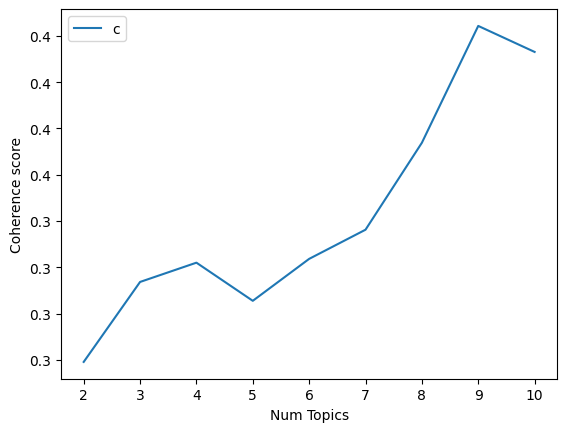

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

#plot
limit=11; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')

formatter = FuncFormatter(lambda y, _: '{:.1f}'.format(y))
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

In [ ]:
optimal_num_topics = x[np.argmax(coherence_values)]
print(f"Optimal Number of Topics: {optimal_num_topics}")

Optimal Number of Topics: 9


In [ ]:
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 1))

Num Topics = 2  has Coherence Value of 0.3
Num Topics = 3  has Coherence Value of 0.3
Num Topics = 4  has Coherence Value of 0.3
Num Topics = 5  has Coherence Value of 0.3
Num Topics = 6  has Coherence Value of 0.3
Num Topics = 7  has Coherence Value of 0.3
Num Topics = 8  has Coherence Value of 0.4
Num Topics = 9  has Coherence Value of 0.4
Num Topics = 10  has Coherence Value of 0.4


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in df['bigram_trigram'] for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df_imp_wcount = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])
print(df_imp_wcount)

           word  topic_id  importance  word_count
0         pajak         0    0.117738        1593
1        barang         0    0.098493        1236
2     indonesia         0    0.062565        1351
3        negara         0    0.033797        1464
4        pintar         0    0.011530         138
..          ...       ...         ...         ...
75     bubarkan         7    0.021826         176
76       berani         7    0.019268         222
77  lahan_basah         7    0.017011         128
78      dipecat         7    0.016651         136
79   pegawainya         7    0.015732         122

[80 rows x 4 columns]


In [ ]:
def format_topics_sentences(ldamodel=None, corpus=None, texts=None):

    sent_topics_df = pd.DataFrame()

    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = pd.concat([sent_topics_df,
                                            pd.DataFrame({'Dominant_Topic': [int(topic_num+1)],
                                                          'Perc_Contribution': [round(prop_topic, 4)],
                                                          'Topic_Keywords': [topic_keywords]})],
                                           ignore_index=True)
            else:
                break

    # Add original text to the end of the output
    sent_topics_df = pd.concat([sent_topics_df, pd.Series(texts)], axis=1)
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords', 'Text']
    return sent_topics_df


In [ ]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=df['bigram_trigram'])

# Format DataFrame
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
print(df_dominant_topic.head(10))

   Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0            0               2              0.5121   
1            1               2              0.9453   
2            2               1              0.4375   
3            3               7              0.3638   
4            4               3              0.6016   
5            5               6              0.5818   
6            6               4              0.7500   
7            7               7              0.6706   
8            8               3              0.3484   
9            9               8              0.8816   

                                            Keywords  \
0  oknum, cukai, pungli, preman, palak, instansi,...   
1  oknum, cukai, pungli, preman, palak, instansi,...   
2  pajak, barang, indonesia, negara, pintar, paja...   
3  bea_cukai, korupsi, pejabat, negara, koruptor,...   
4  maling, bea_cukai, negara, sri, indonesia, mak...   
5  bea, menteri, korup, pejabat, perampok, peratu...   
6  bea_cukai,

In [ ]:
# Simpan DataFrame ke dalam file Excel
df_dominant_topic.to_excel('dominant_topics.xlsx', index=False)

In [ ]:
df_imp_wcount.to_csv('df_imp_wcount.csv')
!cp df_imp_wcount.csv "drive/My Drive/Colab Notebooks/LDA Youtube Gemstik/"

cp: cannot create regular file 'drive/My Drive/Colab Notebooks/LDA Youtube Gemstik/': Not a directory


In [ ]:
df_dominant_topic.to_csv('df_dominant_topic.csv')
!cp df_dominant_topic.csv "drive/My Drive/Colab Notebooks/LDA Youtube Gemastik/"

cp: cannot create regular file 'drive/My Drive/Colab Notebooks/LDA Youtube Gemastik/': Not a directory


In [ ]:
!pip install pyldavis==3.2.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 11.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyldavis: filename=pyLDAvis-3.2.1-py2.py3-none-any.whl size=136163 sha256=31e05f644e5ef6e2cb4628c6495dca7e2c40857180e6354ea3cd6813a070ffe7
  Stored in directory: /root/.cache/pip/wheels/d3/35/9c/c084bb1c3a4b8a7feb32d57c88f572dcf5c3accc949478893f
Successfully built pyldavis


In [ ]:
import pyLDAvis.gensim
import pickle
import pyLDAvis
pyLDAvis.enable_notebook()

In [ ]:
import os
LDAvis_data_filepath = os.path.join('ldavis_prepared_'+str(num_topics))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
if 1 == 1:
   LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary, sort_topics=False)
   with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pyLDAvis/_prepare.py:248: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


In [ ]:
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
pyLDAvis.save_html(LDAvis_prepared, 'ldavis_prepared_'+ str(num_topics) +'.html')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
LDAvis_prepared

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.125815  0.055289       1        1  15.266436
1     -0.329463  0.296224       2        1   9.070120
2      0.121132 -0.093587       3        1  13.679503
3      0.220241  0.088287       4        1  12.201017
4     -0.081082 -0.127328       5        1  12.265781
5     -0.214467 -0.312660       6        1  10.507847
6      0.097093 -0.014955       7        1  16.010190
7      0.060731  0.108729       8        1  10.999105, topic_info=                 Term         Freq        Total Category  logprob  loglift
10          bea_cukai  5828.000000  5828.000000  Default  30.0000  30.0000
13              pajak  2097.000000  2097.000000  Default  29.0000  29.0000
56             barang  1554.000000  1554.000000  Default  28.0000  28.0000
11            korupsi  1283.000000  1283.000000  Default  27.0000  27.0000
30           beacukai  1076.000000  1076.000000  Default  26.0000  26.0000
...               ...          ...          ...      ...      ...      ...
4             petugas   113.600137   490.705316   Topic8  -4.5932   0.7442
140          kekayaan    90.971663   304.898934   Topic8  -4.8153   0.9979
3053        penumpang    76.935576   130.342541   Topic8  -4.9829   1.6802
48            memeras    77.248127   186.723665   Topic8  -4.9789   1.3247
454   oknum_bea_cukai    75.586901   110.137959   Topic8  -5.0006   1.8309

[406 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
1561      3  1.005599      adil
206       1  0.017356      akal
206       2  0.046283      akal
206       4  0.682676      akal
206       5  0.260343      akal
...     ...       ...       ...
292       6  1.002830  viralkan
707       1  0.999573     wajar
35        1  0.805789     warga
35        4  0.128194     warga
35        5  0.067149     warga

[496 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


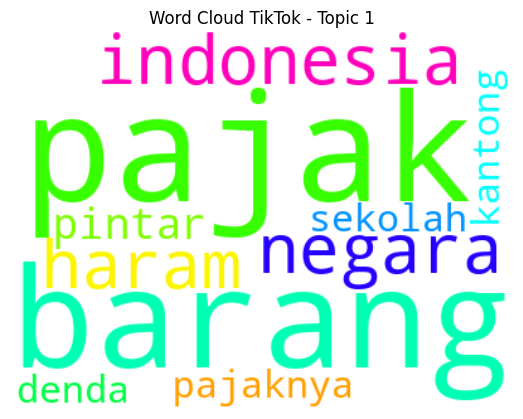

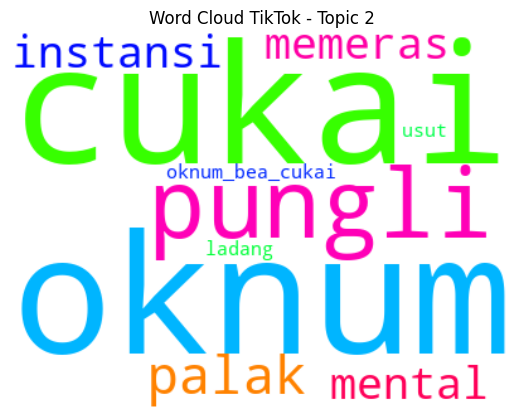

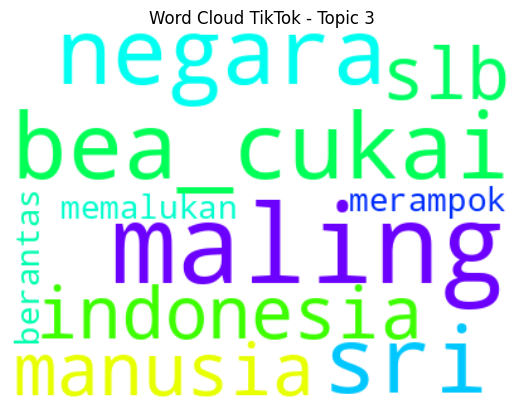

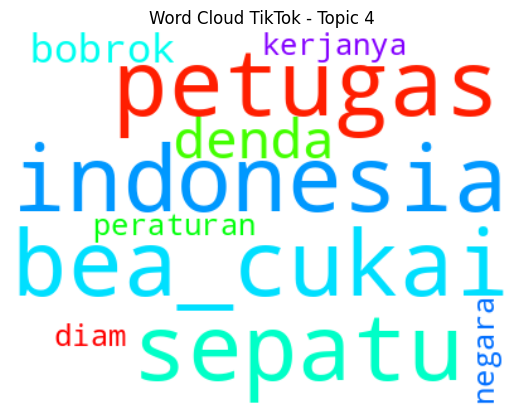

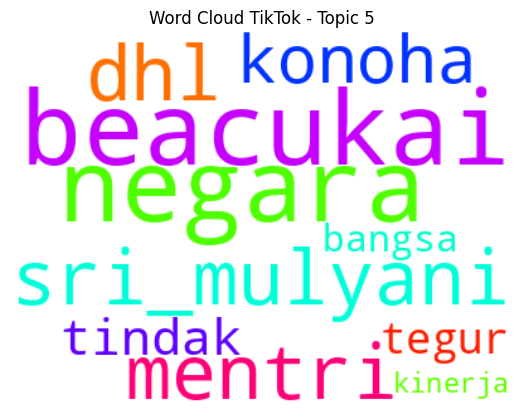

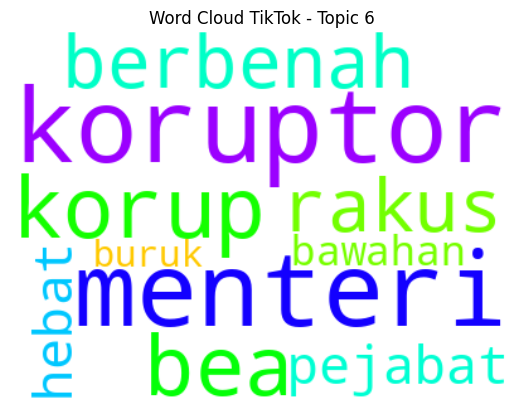

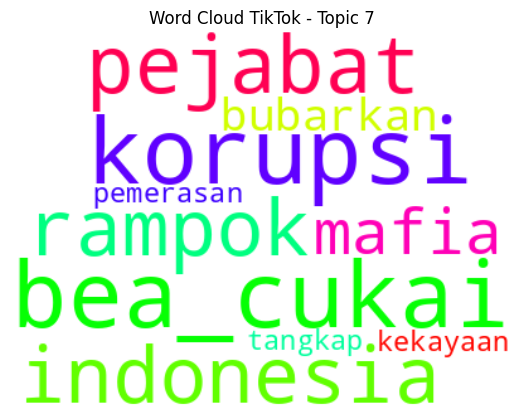

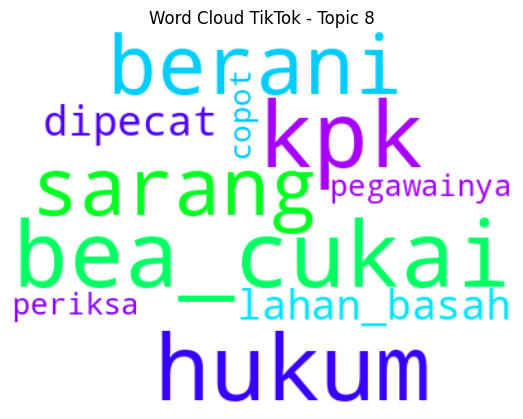

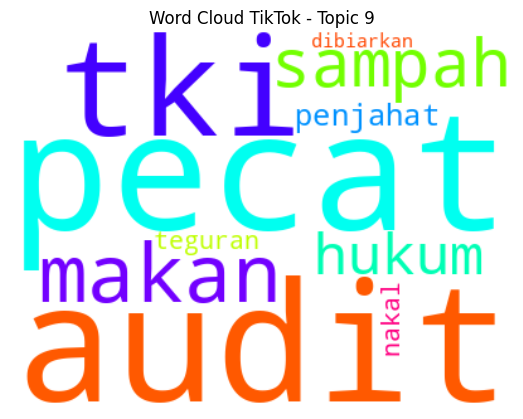

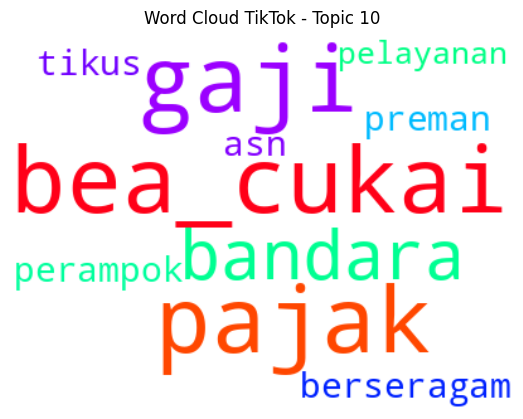

In [ ]:
from gensim.models import LdaModel
from gensim import corpora
from wordcloud import WordCloud
import matplotlib.pyplot as plt

dictionary = corpora.Dictionary.load('dictionary.gensim')
corpus = corpora.MmCorpus('corpus.mm')

num_topics = 10
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=10, alpha=0.1, eta=0.001, random_state=100)

for topic_id, topic_words in lda_model.print_topics():
    words = topic_words.split("+")
    words = [word.split("*")[1].replace('"', '').strip() for word in words]

    text = ' '.join(words)

    wordcloud = WordCloud(width=400, height=300,
                          background_color='white',
                          stopwords=None,
                          min_font_size=5,
                          colormap='hsv').generate(text)

    plt.figure(figsize=(6, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Word Cloud TikTok - Topic {topic_id+1}")
    plt.axis("off")
    plt.tight_layout(pad=0)

    plt.savefig(f"wordcloud_topic_{topic_id+1}.png", bbox_inches='tight', dpi=300)

    plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


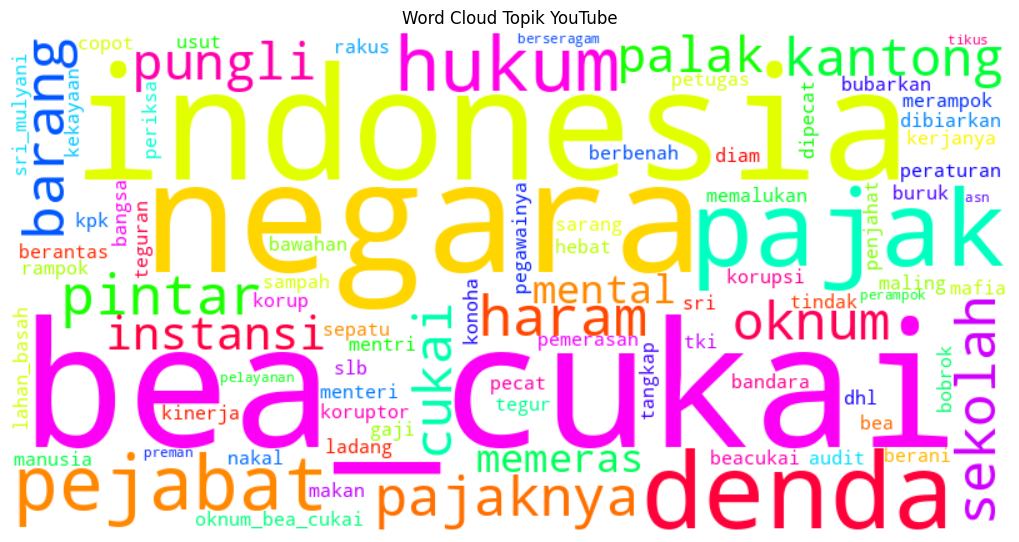

In [ ]:
from gensim.models import LdaModel
from gensim import corpora
from wordcloud import WordCloud
import matplotlib.pyplot as plt

dictionary = corpora.Dictionary.load('dictionary.gensim')
corpus = corpora.MmCorpus('corpus.mm')


num_topics = 10
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=10, alpha=0.1, eta=0.001, random_state=100)

all_topics_words = ' '.join([word for _, topic_words in lda_model.print_topics() for word in topic_words.split('+')])

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='hsv').generate(all_topics_words)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Word Cloud Topik YouTube")
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-48-c716862dede4>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Word', y='Frequency', data=df, palette='viridis')
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dt

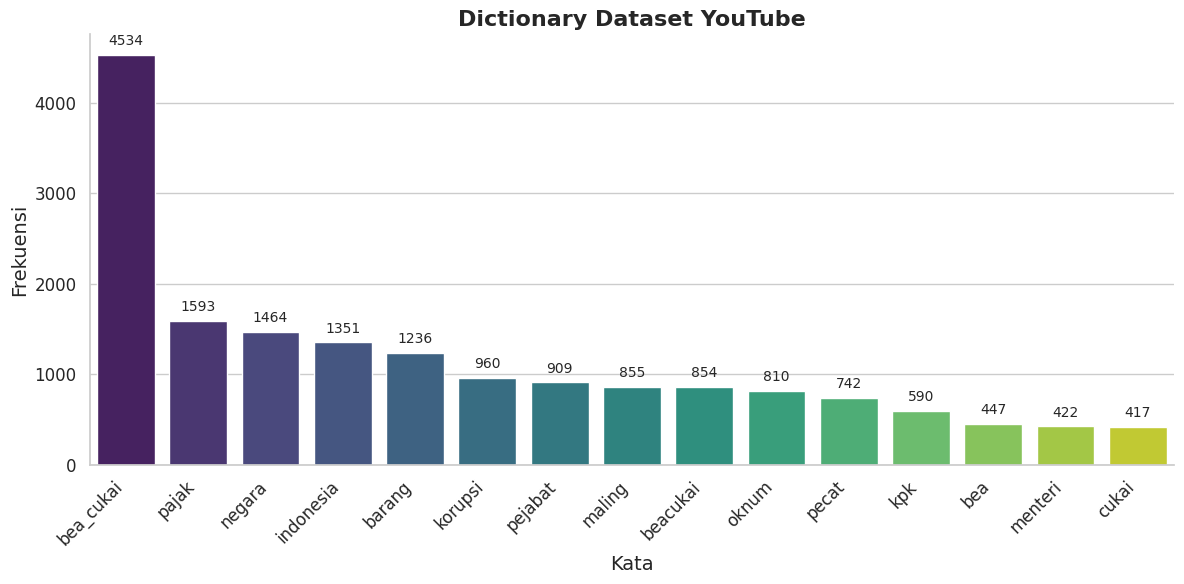

In [ ]:
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

with open('dictionary.gensim', 'rb') as f:
  dictionary = pickle.load(f)
word_frequencies = {dictionary[id]: freq for id, freq in dictionary.cfs.items()}
sorted_words = sorted(word_frequencies.items(), key=lambda item: item[1], reverse=True)

N = 15
top_words = sorted_words[:N]
words = [word for word, freq in top_words]
frequencies = [freq for word, freq in top_words]

import pandas as pd
df = pd.DataFrame({'Word': words, 'Frequency': frequencies})


sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Word', y='Frequency', data=df, palette='viridis')

plt.xlabel('Kata', fontsize=14)
plt.ylabel('Frekuensi', fontsize=14)
plt.title(f'Dictionary Dataset YouTube', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

sns.despine()

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
